# Init Tdx 

In [1]:
# import logging
import sys

# stdout=sys.stdout
sys.path.append('../../')
import os
import random
import time

import matplotlib
import matplotlib.pyplot as plt
import mplfinance as mpf
# sys.stdout=stdout
import numpy as np
# import numpy as np
import pandas as pd
from JohnsonUtil import commonTips as cct
from JSONData import sina_data
from JSONData import tdx_data_Day as tdd
from mplfinance.original_flavor import candlestick_ohlc

# from JSONData import tdx_hdf5_api as h5a

%matplotlib widget
plt.rc('font', family='SimHei', size=13)
matplotlib.get_backend()
# jupyter nbextension enable --py widgetsnbextension

os.environ['NUMEXPR_MAX_THREADS'] = '12'
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import nest_asyncio

nest_asyncio.apply()

In [2]:
block_path = tdd.get_tdx_dir_blocknew() + '060.blk'

## 功能定义DEF

### ra_diff


In [3]:
def ra_diff(df):
    df['ra_diff'] = df.close.apply(lambda x: round(x / df.close.min(), 2))
    return df

### bullish 测算

In [4]:
import numpy as np


def calculate_slope(data):
    # Calculate the slope of the line that connects two points
    slope = round((data[1] - data[0]) / (1), 2)
    return slope


def detect_bull_bear(price_data, window=10):
    # Calculate the slopes of the price data for the last `window` days
    slopes = []
    for i in range(len(price_data) - window, len(price_data) - 1):
        slope = calculate_slope([price_data[i], price_data[i + 1]])
        # print(slope)
        slopes.append(slope)

    # Compare the current slope with the average slope of the last `window` days
    avg_slope = round(np.mean(slopes), 2)
    curr_slope = calculate_slope([price_data[-window], price_data[-1]])
    print(len(slopes), avg_slope, curr_slope)

    if curr_slope > avg_slope:
        # return "Bullish"
        return "Bull"
    else:
        return "Bear"


def detect_bull_bear_apply(price_data, window=10):
    # Calculate the slopes of the price data for the last `window` days
    slopes = []
    # try:
    if len(price_data) > 20:
        for i in range(len(price_data) - window, len(price_data) - 1):
            slope = calculate_slope([price_data[i], price_data[i + 1]])
            # print(slope)
            slopes.append(slope)

        # Compare the current slope with the average slope of the last `window` days
        avg_slope = round(np.mean(slopes), 2)
        curr_slope = calculate_slope([price_data[-window], price_data[-1]])
        # print(len(slopes), avg_slope, curr_slope)

        # if curr_slope > avg_slope:
        #     # return "Bullish"
        #     return "Bull"
        # else:
        #     return "Bear"
        return curr_slope
    else:
        return round((price_data[-1] - price_data[0]) / (1), 2)


code = '601360'
# Example usage
# price_data = [100, 95, 97, 99, 102, 105, 108, 111,1]
dfc = tdd.get_tdx_Exp_day_to_df(
    code, dl=60, resample='d').sort_index(
    ascending=True).reset_index()
# dfc = get_sina_data_cname(dfc)
price_data = dfc.close.values.tolist()
price_data[1], dfc.date[0]
price_data[-1], dfc.date[-1:]
print(detect_bull_bear(price_data))
print(detect_bull_bear_apply(price_data))

# Output: "Bullish"

(10.11, '2023-09-21')

(8.57,
 59    2023-12-21
 Name: date, dtype: object)

9 -0.1 -0.9
Bear
-0.9


### regression_line(X, Y)
regression_ratio(df, window=10):

9.62 -0.01
Above
-0.01


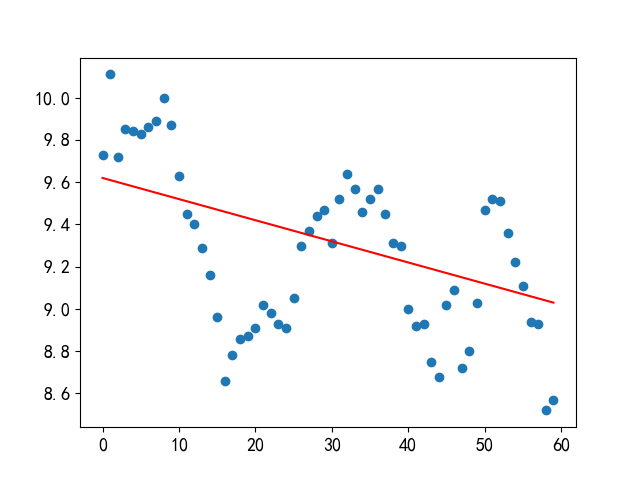

In [5]:


def regression_line(X, Y, limit=10,showall=False):
    # Calculate the coefficients of the regression line
    if not showall:
        X = X[-limit:]
        Y = Y[-limit:]
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_xx = np.sum(X * X)
    a = round((sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x * sum_x), 2)
    b = round((n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x), 2)
    return a, b


def regression_ratio(df, window=10):
    # Calculate the coefficients of the regression line
    if isinstance(df, pd.Series):
        # Y = df.values[-window:]
        # X = df.reset_index().index[-window:]
        Y = df.values
        X = df.reset_index().index
    else:
        if 'close' in df.columns:
            df = df.reset_index()
            # X = df.index[-limit:]
            # Y = df.close[-limit:]
            X = df.index
            Y = df.close
        else:
            # Y = df.values[-limit:]
            # X = df.reset_index().index[-limit:]
            Y = df.values
            X = df.reset_index().index
            
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_xx = np.sum(X * X)
    # a = round((sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x * sum_x),2)
    b = round((n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x), 2)
    return b


def predict_price(time, a, b):
    # Predict the price using the regression line
    price = a + b * time
    return price


def plot_regression_line(X, Y, a, b):
    # Plot the regression line
    # plt.close()
    plt.scatter(X, Y)
    plt.plot(X, a + b * X, color="red")
    plt.show()


def detect_position(price, a, b, X):
    # Detect the position of the current price on the regression line
    regression_price = predict_price(X[-1], a, b)
    if price > regression_price:
        return "Above"
    elif price < regression_price:
        return "Below"
    else:
        return "On"


# Example usage
time_index = dfc.index
price = dfc.close.values
a, b = regression_line(time_index, price,showall=True)
print(a, b)
# Output: (100.0, 5.0)
print(detect_position(132, a, b, time_index))
print(regression_ratio(dfc))
plot_regression_line(time_index, price, a, b)

# print(detect_position(132, a, b, time))
# Output: "On"

9.62 -0.01
Above
-0.01


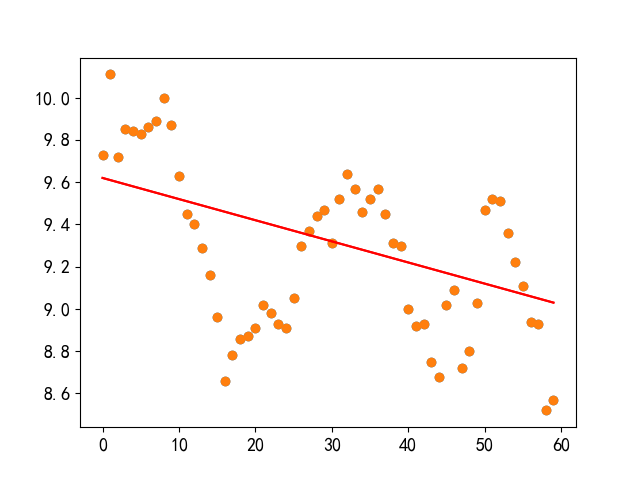

In [6]:


def regression_line(X, Y, limit=10,showall=False):
    # Calculate the coefficients of the regression line
    if not showall:
        X = X[-limit:]
        Y = Y[-limit:]
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_xx = np.sum(X * X)
    a = round((sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x * sum_x), 2)
    b = round((n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x), 2)
    return a, b


def regression_ratio(df, window=10):
    # Calculate the coefficients of the regression line
    if isinstance(df, pd.Series):
        # Y = df.values[-window:]
        # X = df.reset_index().index[-window:]
        Y = df.values
        X = df.reset_index().index
    else:
        if 'close' in df.columns:
            df = df.reset_index()
            # X = df.index[-limit:]
            # Y = df.close[-limit:]
            X = df.index
            Y = df.close
        else:
            # Y = df.values[-limit:]
            # X = df.reset_index().index[-limit:]
            Y = df.values
            X = df.reset_index().index
            
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_xx = np.sum(X * X)
    # a = round((sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x * sum_x),2)
    b = round((n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x), 2)
    return b


def predict_price(time, a, b):
    # Predict the price using the regression line
    price = a + b * time
    return price


def plot_regression_line(X, Y, a, b):
    # Plot the regression line
    # plt.close()
    plt.scatter(X, Y)
    plt.plot(X, a + b * X, color="red")
    plt.show()


def detect_position(price, a, b, X):
    # Detect the position of the current price on the regression line
    regression_price = predict_price(X[-1], a, b)
    if price > regression_price:
        return "Above"
    elif price < regression_price:
        return "Below"
    else:
        return "On"


# Example usage
time_index = dfc.index
price = dfc.close.values
a, b = regression_line(time_index, price,showall=True)
print(a, b)
# Output: (100.0, 5.0)
print(detect_position(132, a, b, time_index))
print(regression_ratio(dfc))
plot_regression_line(time_index, price, a, b)

# print(detect_position(132, a, b, time))
# Output: "On"

In [7]:
dfc.columns

Index(['date', 'code', 'open', 'high', 'low', 'close', 'vol', 'amount', 'ma5d',
       'ma10d',
       ...
       'max5', 'hmax', 'high4', 'low4', 'lastdu4', 'lmin', 'min5', 'cmean',
       'hv', 'lv'],
      dtype='object', length=175)

### check_postion_vol_price

In [8]:
from sklearn.linear_model import LinearRegression


def check_postion_vol_price(df):
    # 加载数据
    # df = pd.read_csv("data.csv")

    # 创建输入数据
    X = df[["close", "vol"]].values
    y = df["close"].values

    # 训练回归模型
    reg = LinearRegression().fit(X, y)

    # 计算斜率和截距
    slope = reg.coef_[0]
    intercept = reg.intercept_

    # 计算上轨和下轨
    upper_band = slope * df["close"] + intercept + 2 * df["vol"]
    lower_band = slope * df["close"] + intercept - 2 * df["vol"]

    # 判断价格是否在通道内
    df["Positon"] = np.where(
        df["close"] > upper_band, "Long", np.where(
            df["close"] < lower_band, "Short", "Neutral"))
    return df


dfc = check_postion_vol_price(dfc)
dfc[-1:]

date    code  open  high   low  close         vol       amount  \
59  2023-12-21  601360  8.44  8.64  8.33   8.57  89609279.0  760959784.0   

    ma5d  ma10d  ...  hmax  high4  low4  lastdu4  lmin  min5  cmean  \
59  8.81   9.11  ...  9.93   9.27  8.51     1.09  8.56  8.51   9.37   

             hv          lv  Positon  
59  286514969.0  47530625.0  Neutral  

[1 rows x 176 columns]

In [9]:

# dfc=  dfc.rename(columns={'date': 'Date', "open":"Open","high":"High","low": "Low","close":"Close"})
dfc.columns
# dfc[["Date", "Open", "High", "Low", "Close"]][-2:]
dfc.date[:3]
dfc.date = pd.to_datetime(dfc.date)
# dfc.set_index('date')
dfc.date[-1:]

Index(['date', 'code', 'open', 'high', 'low', 'close', 'vol', 'amount', 'ma5d',
       'ma10d',
       ...
       'hmax', 'high4', 'low4', 'lastdu4', 'lmin', 'min5', 'cmean', 'hv', 'lv',
       'Positon'],
      dtype='object', length=176)

0    2023-09-21
1    2023-09-22
2    2023-09-25
Name: date, dtype: object

59   2023-12-21
Name: date, dtype: datetime64[ns]

### show_ohlc_upper 

lastb:0.0 xratio:-0.01 


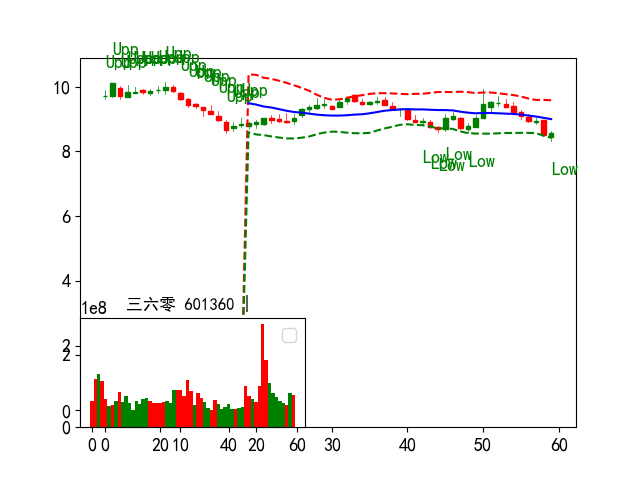

In [10]:

def show_ohlc_upper(df, code=None, allshow=True):
    # 加载数据
    # df = pd.read_csv("data.csv")
    # plt.close()
    # 计算OHLC数据
    # df = df.rename(columns={'date': 'Date', "open": "Open",
    #                "high": "High", "low": "Low", "close": "Close"})
    # df.Date = df.Date.apply(lambda x:str(x).replace('-',''))
    if 'name' not in df.columns and code is not None:
        df['name']= tdd.get_sina_data_code(code)
    if allshow:
        if 'ra_diff' in df.columns:
            print("xratio:%s ra_diff:%s" % (regression_ratio(df),df.ra_diff[-1]))
        else:
            print("xratio:%s " % (regression_ratio(df)))
    # df=df[df.upper > 0]
    df = df.rename(columns={'vol': 'volume'})
    df = df.reset_index()
    # df.date = pd.to_datetime(df.index)
    df.date = df.index
    # print(df.Date)
    # ohlc = df[["Date", "Open", "High", "Low", "Close"]].values
    ohlc = df[["date", "open", "high", "low", "close", 'volume']].values

    # 计算上轨和下轨
    # upper_band = df[df.upper != 0].upper
    # lower_band = df[df.lower != 0].lower
    upper_band = df.upper
    lower_band = df.lower
    
    # print(lower_band,df.lower)
    # print(upper_band,df.upper)

    if 'ma20d' in df.columns:
        ma20d = df[df.ma20d > 0].ma20d
    elif 'ma20' in df.columns:
        ma20d = df[df.ma20 > 0].ma20
    else:
        print('not ma20 ma20d')
    idx = len(df) - len(upper_band)
    idx2 = len(df) - len(lower_band)
    if idx != idx2:
        print(idx, len(df), len(upper_band))
        print(idx2, len(lower_band))

    # 计算当前价格的位置
    position = ['' for i in range(len(df))]
    # print(idx,len(df) ,len(upper_band),position)
    
        # else:
            # position[i] = 'Middle Band'
    # print(position)
    # 绘制OHLC图
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')

    # 添加上轨和下轨
    
    for i in range(idx, len(upper_band), 1):
        # print(df["close"][i])
        # print(upper_band[i],df["low"][i])
        # print(i,lower_band[i])
        #error upper_band ==0.0
        if df["close"][i] > upper_band[i]:
            position[i] = 'Upp'
        elif df["low"][i] < lower_band[i]:
            position[i] = 'Low'
            
    plt.plot(upper_band.index, upper_band, 'r--', label='Upper Band')
    plt.plot(lower_band.index, lower_band, 'g--', label='Lower Band')
    
    plt.plot(ma20d.index, ma20d, 'b', label='ma20')

    if 'hat' in df.columns:
        plt.plot(df.hat.index, df.hat, 'b', label='hat')
    # 添加位置
    for i, txt in enumerate(position):
        if txt == 'Low':
            plt.annotate(txt, (df["date"][i], df["close"][i]), xytext=(
                0, -30), textcoords='offset points', color='g')
        else:
            plt.annotate(txt, (df["date"][i], df["close"][i]), xytext=(
                0, 20), textcoords='offset points', color='g')
    axx = fig.add_subplot(325)
    # axx.plot(df[["volume"]])
    # from matplotlib import transforms
    # pad = 0.25
    # yl = ax.get_ylim()
    # ax.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])
    # axx = ax.twinx()
    # axx.set_position(transforms.Bbox([[0.125,0.1],[0.9,0.32]]))

    volume = np.asarray(df.volume)
    pos = df['open'] - df['close'] < 0
    neg = df['open'] - df['close'] >= 0
    idx = np.asarray([x for x in range(len(df.date))])
    # print len(dates),len(df),ax.get_xlim(),ax.get_xticks()
    axx.bar(idx[pos], volume[pos], color='red', width=1, align='center')
    axx.bar(idx[neg], volume[neg], color='green', width=1, align='center')

    # position = ['' for i in range(len(df))]
    # position = df.Positon
    # for i, txt in enumerate(position):
    #     plt.annotate(txt, (df["Date"][i], df["Close"][i]), xytext=(0,20), textcoords='offset points')
    # 添加图例
    plt.legend(loc='best')
    # plt.legend(["Now:%s" % df.close[-1], "Hi:%s" % df.high[-1], "Lo:%0.2f" % (asset.iat[-1]), "day:%s" %
    #             len(asset), "fib:%s" % (fib),"MA:%s"%(roll_mean_days)], fontsize=12, loc=0)
    if 'name' in df.columns:
        if 'code' in df.columns:
            plt.title(df.name.values[-1:][0] + " " + df.code[0] + " | ", fontsize=12)
        else:
            plt.title(str(df.name.values[-1:][0]) + " " + " | ", fontsize=12)

    else:
        if 'code' in df.columns:
            plt.title(" | " + df.code[0] + " | ", fontsize=12)
        else:
            if code is None:
                plt.title(" | " + " | ", fontsize=12)
            else:
                plt.title(" | " + code + " | ", fontsize=12)

    # 显示图形
    plt.show()


show_ohlc_upper(dfc,code=dfc.code[0])

In [11]:
'code' in dfc.columns

True

### show_channel_mpl

In [12]:
dfc['position'] = 0


def show_channel_mpl_bug(df, limit=60):
    # Compute the channel
    def compute_channel(df):
        # Compute the high and low of the past n periods
        n = 20
        high = df['high'].rolling(window=n, min_periods=n).max()
        low = df['low'].rolling(window=n, min_periods=n).min()
        df['upper_channel'] = high + (high - low) * 0.5
        df['lower_channel'] = low - (high - low) * 0.5

        # Update the position based on the current price
        df['position'] = np.where(df['close'] > df['upper_channel'] * 0.66, 1,
                                  np.where(df['close'] < df['lower_channel'], -1, 0))
        # print(df['position'])

    df = df.rename(columns={'vol': 'volume'})
    # df = df.reset_index()
    if 'date' in df.columns:
        df.date = pd.to_datetime(df.date)
    else:
        df = df.reset_index()
        df.date = pd.to_datetime(df.date)
    df = df.set_index('date')
    # df.date = df.index
    df = df.loc[:, ["open", "high", "low", "close", 'volume']]
    compute_channel(df)

    # fig, ax = plt.subplots()
    # Plot the ohlc chart
    mpf.plot(df, type='candle', title='OHLC chart with channel and position',
             ylabel='Price', volume=True, mav=(10, 20),
             show_nontrading=False, ylabel_lower='Position')
    # returnfig=True)

    # for i, txt in enumerate(df.position):
    #     # print(i,txt,df.index[i], df["close"][i])
    #     if txt == 0:
    #         plt.annotate("Down", (df.index[i], df["close"][i]), xytext=(
    #             0, -30), textcoords='offset points', color='g')
    #     else:
    #         plt.annotate("UP", (df.index[i], df["close"][i]), xytext=(
    #             0, 20), textcoords='offset points', color='g')

    # axlist[0].set_yticks([-1, 0, 1])
    # axlist[2].xaxis.set_ticks(df['position'])
    # axlist[2].set_xticklabels(df['upper_channel'])
    # yticks=[-1, 0, 1], yticklabels=['Sell', 'Hold', 'Buy'],
    # overlays=[(df['upper_channel'], None), (df['lower_channel'], None)])
# show_channel_mpl(dfc)

## TDX def

In [13]:
global sina_dm
sina_dm = None


def get_sina_data_cname(df, dm=None, index=False, realtime=False):
    # index_status=False
    global sina_dm
    if dm is None:
        if sina_dm is None:
            dm = sina_data.Sina().market('all')
        else:
            dm = sina_dm.copy()

    if 'ticktime' in df.columns:
        time_l = time.mktime(dm.loc[:, 'ticktime'][-1].timetuple())
        dur = round((time.time() - time_l) / 60, 2)
        if dur > 5:
            print("timel > 5,renew dm")
            dm = sina_data.Sina().market('all')
            sina_dm = dm.copy()

    if realtime:
        print("compute percent")
        df.rename(columns={'low': 'llow',
                  'high': 'lhigh', 'open': 'lopen'}, inplace=True)
        if 'nclose' in dm.columns:
            dd = cct.combine_dataFrame(
                df, dm.loc
                [:,
                 ['nclose', 'close', 'name', 'open', 'high', 'low', 'llastp',
                  'ticktime']],
                clean=True)
        else:
            dd = cct.combine_dataFrame(
                df, dm.loc
                [:, ['close', 'name', 'open', 'high', 'low', 'llastp', 'ticktime']],
                clean=True)
        dd['perc'] = ((dd['close'] - dd['llastp']) / dd['llastp'] *
                      100).map(lambda x: round(x, 2))
        # dd = cct.combine_dataFrame(df, dm['name'])

    else:
        dd = cct.combine_dataFrame(df, dm['name'])
    # cname = sina_data.Sina().get_code_cname(code)
    return dd


def write_code_to_blk(codew, blk='060'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 3:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))
    return True

def get_multiIndex_drop_last_row(df,dropline=1):

    return df.drop(level='date', labels=df.index.get_level_values('date')[-dropline])

def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df

def clean_sina_dm(dd):
    if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
        dd = dd[dd.close > 0]
    else:
        dd = dd[dd.open > 0]
    return dd

def compute_perd_value(df, market_value=3, col="vol", col_new='volsum'):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col)) &
                (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col_new, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def show_tdx_data(df, codelist=None, market_value='3', col=None):
    col_src = [
        "name", "couts", "date", "perc", "ra_diff","xratio", "idx", "hat", "close",
        "volsum5d", "hmax", "lmin", "perc1d", "ma20", "ma250", "nclose",
        "llow", 'vol1d', 'vol2d', 'vol3d', 'vol4d', 'vol5d', "perc%sd" %
        (market_value),
        "perc5d"]

    if isinstance(df, pd.Series):
        col_name = [co for co in col_src if co in df.index]
        # col_name.insert(1,'date')
    else:
        col_name = [co for co in col_src if co in df.columns]

    # print(col_name)
    # if isinstance(df, pd.DataFrame) and 'name' in df.columns:
    #     columns_ = col_name
    # else:
    #     if isinstance(df, pd.Series) and 'name' in df.index:
    #         columns_ = col_name.insert(1, "date")
    #     else:
    #         columns_ = col_name.remove("name")
    
    if isinstance(col,list):
        col_name.extend(col)
    elif col is not None:
        col_name.insert(4, col)

    if codelist is None:
        if isinstance(df, pd.Series):
            print("Count:1")
            temp = df.loc[col_name]
        else:
            print("Count:%s %s" % (df.shape))
            temp = df.loc[:, col_name]
    else:
        temp = df.loc[[x for x in codelist if x in df.index], col_name]
    return temp


def get_multi_date_duration(df, dt):
    dd = df.reset_index()
    dd = dd[dd.date >= dt]
    # dd['couts'] = dd.groupby(['code'])['code'].transform('count')
    dd = dd.set_index(['code', 'date'])
    return dd


def get_multi_code_count(df, col='code'):
    dd = df.reset_index()
    dd['couts'] = dd.groupby([col])[col].transform('count')
    dd = dd.sort_values(by=['couts', 'date'], ascending=[0, 1])
    print('count dd.couts')
    dd = dd.set_index(['code', 'date'])
    return dd


def multindex_iloc(df, index):
    label = df.index.levels[0][index]
    return df.iloc[df.index.get_loc(label)]


def get_groupby_mean_median_close(dfs):

    groupd = dfs.groupby(level=[0])

    df = groupd['close'].agg(['median', 'mean'])
    df['close'] = groupd.tail(1).reset_index().set_index(['code'])['close']
    # dfs['mean'] = groupd['close'].agg('mean')
    # dfs['median'] = groupd['close'].agg('median')

    # dfs = dfs.fillna(0)
    # idx = pd.IndexSlice
    # mask = ( (dfs['mean'] > dfs['median'])
    #         & (dfs['close'] > dfs['mean'])
    #         )
    # df=dfs.loc[idx[mask, :]]

    df = df[(df['mean'] > df['median']) & (df['close'] > df['mean'])]

    # dt_low = None
    # if dl == 1:
    #     dfs = groupd.tail(1)
    #     print("dfs tail1")
    # else:
    #     dl = 30
    #     dindex = tdd.get_tdx_Exp_day_to_df(
    #         '999999', dl=dl).sort_index(ascending=False)
    #     dt = tdd.get_duration_price_date('999999', df=dindex)
    #     dt = dindex[dindex.index >= dt].index.values
    #     dt_low = dt[-1]
    #     dtlen = len(dt) if len(dt) >0 else 1
    #     dfs = groupd.tail(dtlen)
    #     print("dfs tail:%s dt:%s"%(dtlen,dt))
    #     dfs = get_multi_date_duration(dfs,dt[-1])
    return df


def compute_df_Col_lastday(dfs, col='close', colre='perc', days=3, plus=True):
    for da in range(int(days)):
        da += 1
        if plus:
            dfs['%s%sd' % (colre, da)] = round(
                (dfs[col] - dfs[col].shift(da)) / dfs[col].shift(da) * 100, 2)
        else:
            if da == 1:
                dfs['%s%sd' % (colre, da)] = round(
                    (dfs[col] - dfs[col].shift(da)) / dfs[col].shift(da) * 100, 2)
            else:
                dfs['%s%sd' % (colre, da)] = round(
                    (dfs[col].shift(da - 1) - dfs[col].shift(da)) / dfs[col].shift(da) * 100, 2)
    return dfs

In [14]:
def get_roll_mean_all(
        single=True, tdx=False, app=True, duration=100, ma_250_l=1.02,
        ma_250_h=1.11, resample='d'):
    time_s = time.time()
    if not app and cct.get_file_size(block_path) > 100 and cct.creation_date_duration(block_path) == 0:
        print("It's Today Update")
        return True
    code_list = sina_data.Sina().market('all').index.tolist()
    code_list.extend(['999999', '399001', '399006'])
    print("all code:", len(code_list))
    if duration < 300:
        h5_fname = 'tdx_all_df' + '_' + str(300)
        h5_table = 'all' + '_' + str(300)
    else:
        h5_fname = 'tdx_all_df' + '_' + str(900)
        h5_table = 'all' + '_' + str(900)
    # df = tdd.search_Tdx_multi_data_duration('tdx_all_df_300', 'all_300', df=None,code_l=code_list, start='20150501', end=None, freq=None, col=None, index='date')
    df = tdd.search_Tdx_multi_data_duration(
        h5_fname, h5_table, df=None, code_l=code_list, start=None, end=None,
        freq=None, col=None, index='date')
    # df = tdd.search_Tdx_multi_data_duration(h5_fname, h5_table, df=None,code_l=code_list, start=None, end=None, freq=None, col=None, index='date',tail=1)

    code_uniquelist = df.index.get_level_values('code').unique()

    code_select = code_uniquelist[random.randint(0, len(code_uniquelist) - 1)]
    print(round(time.time() - time_s, 2), df.index.get_level_values(
        'code').unique().shape, code_select, df.loc[code_select].shape)
    # df.groupby(level=[0]),df.index.get_level_values(0)
    # len(df.index.get_level_values('code').unique())
    # df = df[~df.index.duplicated(keep='first')]

    # multiIndex_func = {'close': 'mean', 'low': 'min', 'high': 'max', 'volume': 'sum', 'open': 'first'}
    # cct.using_Grouper(df, freq='W', col={'close': 'last'})
    # *** TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
    # roll_dl = duration
    if resample != 'd':

        print("resample:%s"%(resample.upper()))
        df = df.groupby(level=0).resample(resample, level=1).last()
        df = df.dropna()
        
    ''' 
    if resample != 'd':
        print("resample:%s" % (resample.upper()))
        # ohlc_dict = {'volume': 'sum','high': 'max','low': 'min','close': 'last'}
        # {'low': 'min', 'close':'mean'}
        # df = df.groupby(level=0).resample(resample, level=1).agg({'close':'last'})
        # df = df.loc[:, ['open','close', 'low', 'high']].groupby(level=0).resample(resample, level=1).agg({'close':'last'})
        df = df.loc[:, ['close']].groupby(level=0).resample(
            resample, level=1).agg({'close': 'last'}).dropna()

        df = df.dropna()
        # df = df.loc[:, ['open','close', 'low', 'high']].groupby(level=0).resample(resample, level=1, how={'low': 'min', 'close':'mean'})
        # df = df.loc[:, ['open','close', 'low', 'high']].groupby(pd.Grouper(freq=resample)).transform(np.cumsum).resample(resample, how='ohlc')

        # df = df.loc[:, ['open','close', 'low', 'high']].groupby(pd.TimeGrouper(resample)).transform(np.cumsum).resample(resample, how='ohlc')
        # r1 = len(df.loc['000001'])
        # r2 = len(df.loc['999999'])
        # roll_dl = r1 if r1 < r2 else r2

        # df['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
        # df['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
        # df['ene'] = map(lambda x, y: round((x + y) / 2, 1), df.upper, df.lower)
        # dfs['amount%d'%cumdays] = groupd['amount'].apply(pd.rolling_mean, cumdays)
    # df.ix[df.index.levels[0]]
    # df.ix[df.index[len(df.index)-1][0]] #last row
    # dfs = tdd.search_Tdx_multi_data_duration(df=dfs,code_l=code_list, start='20170918', end='20170918', freq=None, col=None, index='date')

    # print dfs[:1],len(dfs)
    # groupd.agg({'low': 'min'})
    #  idx mask filter 
    # h5a.write_hdf_db('all300', df, table='roll200', index=False,baseCount=500, append=False, MultiIndex=MultiIndex)
    '''

    df = df.reset_index().sort_values(by=['code', 'date'], ascending=[0, 1]).set_index(['code', 'date'])
    print("use time:%s" % (round(time.time() - time_s, 2)))
    return df

# 读取数据 TDX Days

## resample = 'w'

In [15]:
resample = 'W-FRI'
# resample = 'D'

df = get_roll_mean_all(
    single=False, tdx=True, app=True, duration=250, ma_250_l=1.02,
    ma_250_h=1.2, resample=resample)


# df= df.groupby(level=[0]).tail(1).reset_index().set_index('code')
# df_cname = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
# df = df.reset_index().set_index(['code', 'date'])

lastb:0.0 all code: 4961
1.89 (4961,) 603299 (301, 6)
resample:W-FRI
use time:15.51


In [16]:
# df.loc['399001'][-1:]
df.loc['000002'][-1:]
# df.groupby(level=[0]).tail(30).groupby(level=[0]).tail(2)
# df.groupby(level=[0]).tail(30).groupby(level=[0]).head(1)

open   high    low  close         vol        amount
date                                                           
2023-12-22  10.2  10.44  10.18  10.42  55284133.0  5.728430e+08

### Test InStock

In [89]:
df.loc['301083'][:2]

open   high    low  close         vol        amount  ra_diff
date                                                                     
2023-05-26  30.00  30.32  24.90  24.97  38273584.0  1.069287e+09     1.58
2023-06-02  20.55  21.26  20.28  20.96  14335470.0  2.968821e+08     1.32

## ra_diff

In [18]:
df = df.groupby(level=[0]).tail(30).groupby(level=[0]).apply(ra_diff)


In [19]:
# df.loc['999999'][-3:]
# df.loc['301073'].ra_diff[-3:]
df.loc['300459'].shape

(30, 7)

## X df_regression_ratio outdate
    df_idx_detect

In [20]:
# df_reg_ratio = df.groupby(level=[0])['close'].apply(regression_ratio)
# df_idx_detect = df.groupby(level=[0])['close'].apply(detect_bull_bear_apply)
# show_ohlc_upper()
# df[:10]

In [21]:
# df_idx_detect.shape, df_idx_detect.loc['000002']
# df.loc['000002'][-2:],df_reg_ratio.loc['000002']
# df.loc['688798'][-3:]

In [22]:
# df.loc['000002'][-10:]

## sina_dm

In [23]:
sina_dm = sina_data.Sina().market('all')
lastday = cct.last_tddate()
lastday,sina_dm.name[:1]
sina_dm = clean_sina_dm(sina_dm)

lastb:0.0 

('2023-12-20',
 code
 300327    中颖电子
 Name: name, dtype: object)

In [24]:
cct.get_time_to_date(time.time(), format='%Y-%D %H:%M:%S')

# abc=dm.loc[:,'ticktime'][-1]
sina_dm.ticktime[-2:]
# dm.ticktime[:1]
# sina_dm.loc[:, 'ticktime'][-1]
# time.strptime(abc,format='%Y-%m-%d %H:%M:%S')
# (time.mktime(abc.timetuple()))
(time.time() - time.mktime(sina_dm.loc[:, 'ticktime'][-1].timetuple())) / 60

'2023-12/21/23 23:29:53'

code
002123   2023-12-21 15:00:00
300264   2023-12-21 15:35:30
Name: ticktime, dtype: datetime64[ns]

474.3939260641734

### Combine ratio and idx

In [ ]:
# if 'date' in df.columns:
#     print('error duplicated date col')
#     if isinstance(df,pd.MultiIndex):
#         df.drop('date', axis=1, inplace=True)
# else:
#     df = df.reset_index().set_index('code')
#     df['idx'] = df_idx_detect
#     df['xratio'] = df_reg_ratio
#     df['name'] = sina_dm.name
#     df = df.reset_index().set_index(['code', 'date'])

## 读取实时成交量数据

In [25]:
def apply_col_toint(df, col=None):
    if col is None:
        co2int = ['boll', 'op', 'ratio', 'fib', 'fibl', 'df2']
    # co2int.extend([co for co in df.columns.tolist()
    #                if co.startswith('perc') and co.endswith('d')])
        co2int.extend(['top10', 'topR'])
    else:
        co2int = col
    co2int = [inx for inx in co2int if inx in df.columns]

    for co in co2int:
        df[co] = df[co].astype(int)

    return df

def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    df = apply_col_toint(df)
    store.close()
    return df

In [26]:
# tdx_path = "G:\\tdx_last_df.h5"
# from JohnsonUtil import commonTips as cct
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
# h5[:1]
code_muti = '600519'
# h5.loc[code_muti][:2]

freq = 'D'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()
time_ratio
run_col = ['close', 'volume']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol / 1000 / 1000 / 1000
mdf['amount']=mdf['volume'].apply(lambda x: round(x /100,2)) 
mdf['vol']=(mdf.volume / mdf.close).map(lambda x: round(x/100, 2))
mdf['volume'] = mdf.volume.apply(
    lambda x: round(x / allvol * 100 / time_ratio, 2))
mdf=mdf.reset_index().set_index('code')

['/all_10']
G:\sina_MultiIndex_data.h5


(2460024, 6)

1.0

13873.423427502

In [27]:
# h5.index.get_level_values('code')[0]
# help(h5.index.get_level_values)
str(h5.index.get_level_values(1)[-1])[:10]

'2023-12-21'

In [28]:
if len(mdf) > 0:
    mdf.loc['000002']
else:
    print("mdf is None")

ticktime    2023-12-22 00:00:00
close                 10.354141
volume                     0.09
amount             125613939.12
vol                 12131758.11
Name: 000002, dtype: object

###  实时成交量个股Top

In [29]:
nowdf = mdf.sort_values(by=['volume'], ascending=[0])
# nowdf.shape, df.shape, code_idx.shape
# top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
top20_nd=get_sina_data_cname(top20_nd)

In [30]:
nowdf.shape,top20_nd

((4900, 5),
         volume  name
 code                
 000656    1.58  金科股份
 002292    0.83  奥飞娱乐
 002354    0.58  天娱数科
 300063    0.52  天龙集团
 600010    0.51  包钢股份
 601012    0.47  隆基绿能
 601099    0.45   太平洋
 000725    0.42  京东方Ａ
 601288    0.40  农业银行
 002640    0.39   跨境通
 600630    0.38  龙头股份
 002146    0.35  荣盛发展
 600348    0.34  华阳股份
 000892    0.34  欢瑞世纪
 601398    0.32  工商银行
 600159    0.32  大龙地产
 002002    0.32  ST鸿达
 002526    0.30  山东矿机
 600157    0.29  永泰能源
 300315    0.29  掌趣科技)

### 合并实时成交量及SinaDM

In [31]:
# mdf[:1]
sinadm = cct.combine_dataFrame(sina_dm, mdf[['vol','amount']])
sinadm[:1]

name   open  llastp    now  trade   high    low    buy   sell  \
code                                                                    
300327  中颖电子  22.74   22.79  22.93    0.0  23.02  22.46  22.93  22.94   

         volume  ...  close     nvol         timel  lastbuy   nlow  nhigh  \
code             ...                                                        
300327  3240225  ...  22.93  3240225  1.703146e+09    22.93  22.52  22.85   

        nclose  nstd        vol      amount  
code                                         
300327   22.67  -2.0  294658.96  6679918.65  

[1 rows x 44 columns]

## check HDF LastDate

In [32]:
df_tail1 = df.groupby(level=[0]).tail(1)
# df_tail1.index

df_tail1[df_tail1.index.get_level_values('date') == cct.get_today()].shape
df_tail1[df_tail1.index.get_level_values('date') != cct.get_today()].shape

(0, 7)

(4961, 7)

In [33]:
df_tail1[df_tail1.index.get_level_values('date') != cct.get_today()][:1]

open       high        low      close          vol  \
code   date                                                                  
999999 2023-12-22  2892.0201  2918.9545  2882.0195  2915.1405  200744163.0   

                         amount  ra_diff  
code   date                               
999999 2023-12-22  2.225035e+11      1.0

In [34]:
# df.info()
# code_t = '600519'
# print(dfNow.loc[code_t][-3:])
# df.loc['000001'][-1:]
# dfbak = df.copy()
# df[(df.idx > df.idx.shift(1)) & (df.xratio > df.xratio.shift(1))].shape


## reindex sort date

In [35]:
# df = df.reset_index().sort_values(by=['code', 'date'], ascending=[0, 1]).set_index(['code','date'])

## 初始化参数

In [36]:
app = True
tdx = True
duration = 300
ma_250_l = 1.02
ma_250_h = 1.2

if resample.upper() == 'D' or resample.lower() == 'd':
    if duration < 300:
        rollma = ['10', '5', '20']
    else:
        rollma = ['10', '5', '20', '250']

elif resample.upper() == 'W' or resample.lower() == 'w':
    rollma = ['5', '10']
else:
    rollma = ['5', '10']
        

def init_MulitiData_Roll(df,resample='d',duration=300):
    time_s = time.time()
    dfs = df.copy()
    # dfs = df.loc['600519']
    # groupd = dfs.groupby(level=[0])
    # groupd.['close']
    # rollma = ['5','10','60','100','200']
    # rollma = ['5','10','250']
    # df.index.get_level_values('code')[0]
    if resample.upper() == 'D' or resample.lower() == 'd':
        if duration < 300:
            rollma = ['10', '5', '20']
        else:
            rollma = ['10', '5', '20', '250']

    elif resample.upper() == 'W' or resample.lower() == 'w':
        rollma = ['5', '10','20']
    else:
        rollma = ['5', '10','20']

    # rollma.extend([str(duration)])

    # import ipdb;ipdb.set_trace()
    # df.loc['300130'][:2]

    # dfs['mean'] = groupd['close'].agg('mean')
    # dfs['median'] = groupd['close'].agg('median')

    # BOLL:MA(CV,N), COLORMAGENTA;
    # UPPER:BOLL+P*STD(CV,N), COLORYELLOW;
    # LOWER:BOLL-P*STD(CV,N), COLORYELLOW;
    # df['BollUpper'] = df.close.shift(10).mean()+2*df.close.shift(10).std()
    # df['BollDown'] = df.close.shift(10).mean()-2*df.close.shift(10).std()
    for da in rollma:
        cumdays = int(da)
        dfs['ma%d' % cumdays] = round(dfs['close'].rolling(cumdays).mean(), 2)

        # dfs['upper'] = dfs['ma%d' % cumdays].apply(
        #     lambda x: round((1 + 11.0 / 100) * x, 1))
        # dfs['lower'] = dfs['ma%d' % cumdays].apply(
        #     lambda x: round((1 - 9.0 / 100) * x, 1))
        # dfs['boll'] = list(map(lambda x, y: round(
        #     (x + y) / 2, 1), dfs['upper'], dfs['lower']))
    if duration > 100:
        dfs['upper'] = round(
            dfs['close'].rolling(20).mean() + 2 *
            dfs['close'].rolling(20).std(),
            2)
        dfs['lower'] = round(
            dfs['close'].rolling(20).mean() - 2 *
            dfs['close'].rolling(20).std(),
            2)

        dfs['boll'] = round(dfs['close'].rolling(20).mean(), 2)

        dfs['hmax'] = round(dfs['high'].rolling(20).max(), 2)
        dfs['lmin'] = round(dfs['low'].rolling(20).min(), 2)

        dfs['hat'] = dfs['upper'] - dfs['lower']

        # dfs['hmax'] = round(dfs['close'].cummax(), 2)


    dfs = compute_df_Col_lastday(dfs, col='close', colre='perc', days=5)
    dfs = compute_df_Col_lastday(dfs, col='vol', colre='vol', days=5, plus=False)
    dfs = compute_perd_value(dfs, market_value=5, col='vol', col_new='volsum')

    return dfs
# dfs['perc1d'] = round(
#     (dfs['close'] - dfs['close'].shift(1)) / dfs['close'].shift(1) * 100, 2)
# dfs['perc3d'] = round(
#     (dfs['close'] - dfs['close'].shift(3)) / dfs['close'].shift(3) * 100, 2)
# dfs['perc5d'] = round(
#     (dfs['close'] - dfs['close'].shift(5)) / dfs['close'].shift(3) * 100, 2)

In [37]:
dfs=init_MulitiData_Roll(df,resample=resample)

### DFS MutiIndex Test 0507

In [88]:
# dfs.loc['000002'][-5:].upper
dfs.loc['603357'][-5:][['close','upper','low','boll']][:2]
dftemp = dfs.loc['603357']
dftemp[dftemp.close > dftemp.upper][:2]

close  upper   low  boll
date                                
2023-11-24   9.20  10.77  9.16  9.55
2023-12-01   9.26  10.70  9.09  9.50

Empty DataFrame
Columns: [open, high, low, close, vol, amount, ra_diff, ma5, ma10, ma20, upper, lower, boll, hmax, lmin, hat, perc1d, perc2d, perc3d, perc4d, perc5d, vol1d, vol2d, vol3d, vol4d, vol5d, volsum5d, ma51d, xratio, idx]
Index: []

[0 rows x 30 columns]

In [39]:
# dfs.loc['688027']
dfs['ma51d'] = round(dfs['close'].rolling(5).mean(), 2)
show_tdx_data(dfs.loc['600519'][-2:],col=['ma51d','ra_diff'])
# show_tdx_data(dfs.loc['600519'])

Count:2 28


ra_diff     hat   close  volsum5d     hmax     lmin  perc1d  \
date                                                                      
2023-12-15     1.00  289.05  1645.0     165.4  1906.52  1616.25   -3.51   
2023-12-22     1.02  284.65  1670.0     111.7  1906.52  1616.25    1.52   

               ma20  vol1d  vol2d   vol3d   vol4d  vol5d  perc3d  perc5d  \
date                                                                       
2023-12-15  1782.58  41.10 -20.46  152.58  -39.74  31.87   -7.43   -7.37   
2023-12-22  1771.23 -21.79  41.10  -20.46  152.58 -39.74   -5.13   -4.76   

              ma51d  ra_diff  
date                          
2023-12-15  1728.12     1.00  
2023-12-22  1711.44     1.02

### Append Now SinaTo MultiIndex dfNow

In [40]:
cct.get_today()
def get_Append_Sina_To_MultiTDX(df,sina_dm):
    sina_today=sina_dm.copy()
    if not isinstance(sina_today,pd.MultiIndex) and  'date' not  in sina_today.columns:
        sina_today['date']=pd.to_datetime(cct.get_today())
        print('concat1 init:sina_today:%s'%(sina_today.index[0]))
        # df_reg_ratio2 = df.groupby(level=[0])['close'].apply(regression_ratio)
        # df_idx_detect2 = df.groupby(level=[0])['close'].apply(detect_bull_bear_apply)
        # sina_today['idx'] = df_idx_detect2
        # sina_today['xratio'] = df_reg_ratio2
        # sina_today=sina_today.loc[:,['open','high','low','close','date','idx',y'xratio']].reset_index().set_index(['code', 'date'])
        if 'vol' in sina_today.columns:
            sina_today=sina_today.loc[:,['open','high','low','close','vol','amount','name','date']].reset_index().set_index(['code', 'date'])
        else:
            sina_today=sina_today.loc[:,['open','high','low','close','date']].reset_index().set_index(['code', 'date'])

    if sina_today.index[0] not in df.index:
        # df.index=df.index.append(sina_dm.index)
        print('concat1:sina_today:%s %s'%(sina_today.index[0]))
        df = pd.concat([df, sina_today])


#         sina_today=sina_dm.copy()
#         #drop line and append idx
#         if not isinstance(sina_today,pd.MultiIndex) and  'date' not  in sina_today.columns:
#             sina_today['date']=pd.to_datetime(cct.get_today())
#             print('concat2 init:sina_today:%s'%(sina_today.index[0]))

#             sina_today['idx'] = df_idx_detect2
#             sina_today['xratio'] = df_reg_ratio2
#             sina_today=sina_today.loc[:,['open','high','low','close','date','name','idx','xratio']].reset_index().set_index(['code', 'date'])
#             # sina_today=sina_today.loc[:,['open','high','low','close','date']].reset_index().set_index(['code', 'date'])   


#         df = get_multiIndex_drop_last_row(df,dropline=1)

        if sina_today.index[0] not in df.index:
            # df.index=df.index.append(sina_dm.index)
            print('concat2:sina_today:%s %s'%(sina_today.index[0]))
            df = pd.concat([df, sina_today])
        df = df.reset_index().sort_values(by=['code', 'date'], ascending=[0, 1]).set_index(['code','date'])
    return df

# dfNow=get_Append_Sina_To_MultiTDX(df.groupby(level=[0]).tail(30),sina_dm)


if resample.upper() == 'D':
    dfNow=get_Append_Sina_To_MultiTDX(dfs.groupby(level=[0]).tail(30),sinadm)
    dfNow=init_MulitiData_Roll(dfNow,resample=resample,duration=20)
else:
    dfNow = dfs.groupby(level=[0]).tail(30).copy()
# df = df.reset_index().sort_values(by=['code', 'date'], ascending=[0, 1]).set_index(['code','date'])
# df.loc[code_df][-2:]


'2023-12-21'

In [41]:
# dfNow.loc['000002']

### Xratio and tail 30 MultiIndex 

In [42]:
# dfNow['xratio'] = dfNow['close'].rolling(30).apply(regression_ratio)
df_xratio = dfNow.groupby(level=[0])['close'].rolling(24).apply(regression_ratio)
df_xratio.index =df_xratio.to_frame().index.droplevel(1)
dfNow['xratio'] = df_xratio

In [43]:
# dfNow['idx'] = dfNow['close'].rolling(25).apply(detect_bull_bear_apply)
df_idx = dfNow.groupby(level=[0])['close'].rolling(25).apply(detect_bull_bear_apply)
df_idx.index =df_idx.to_frame().index.droplevel(1)
dfNow['idx'] = df_idx

### dfNow Top

date
2023-12-15    6.16
2023-12-22    6.12
Name: upper, dtype: float64

lastb:0.0 xratio:-0.06 ra_diff:1.24


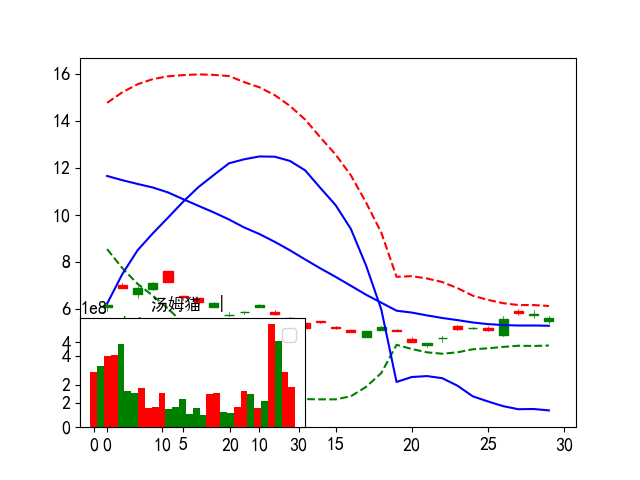

In [44]:
dfNow.loc['300459'][-2:].upper
show_ohlc_upper(dfNow.loc['300459'][-30:],code='300459')

000656 2.24
lastb:0.0 xratio:0.02 ra_diff:2.24


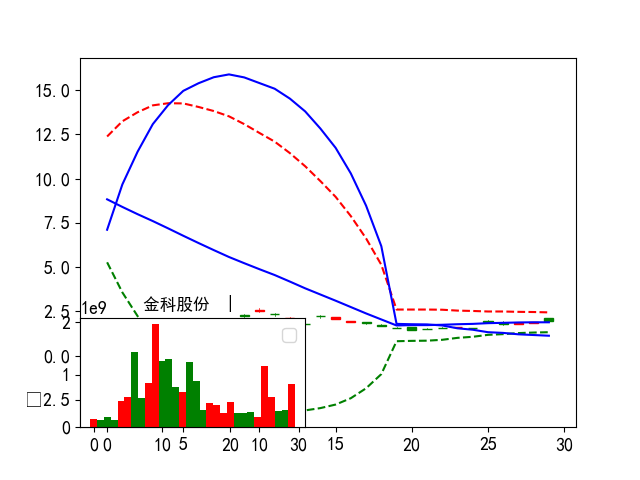

002292 1.41
lastb:0.0 xratio:-0.07 ra_diff:1.41


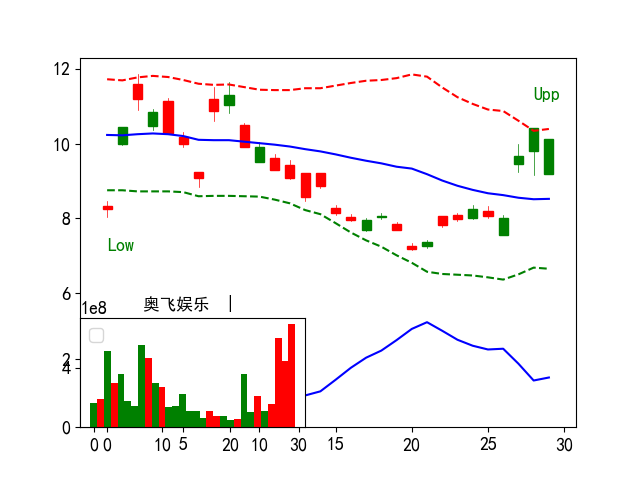

002354 1.35
lastb:0.0 xratio:-0.06 ra_diff:1.35


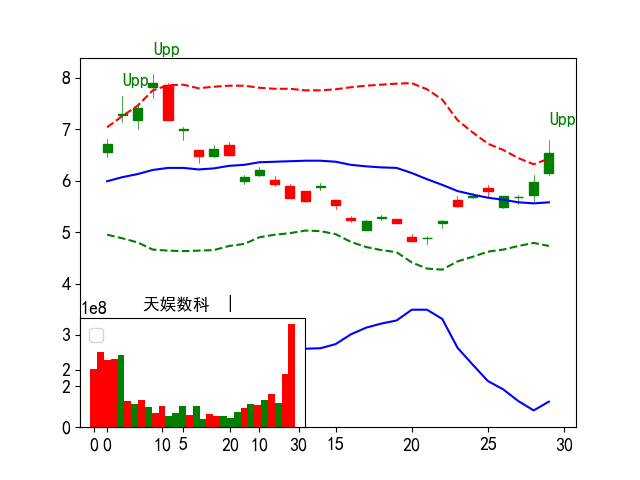

300063 2.03
lastb:0.0 xratio:0.1 ra_diff:2.03


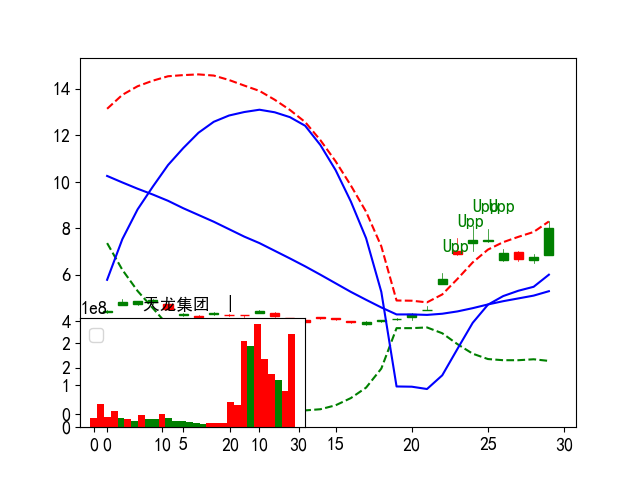

600010 1.0
lastb:0.0 xratio:-0.01 ra_diff:1.0


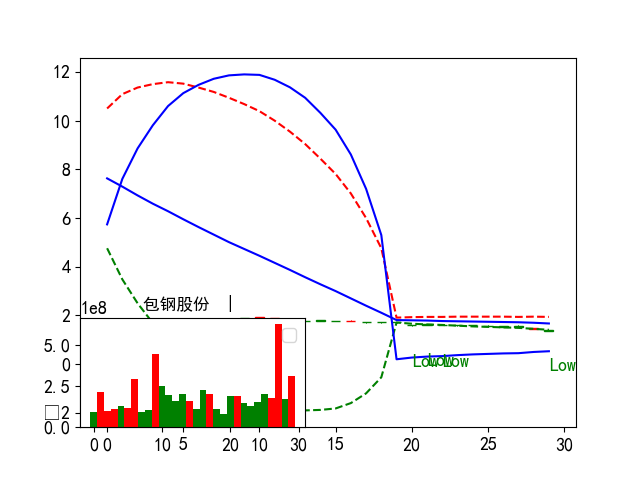

601012 1.03
lastb:0.0 xratio:-0.31 ra_diff:1.03


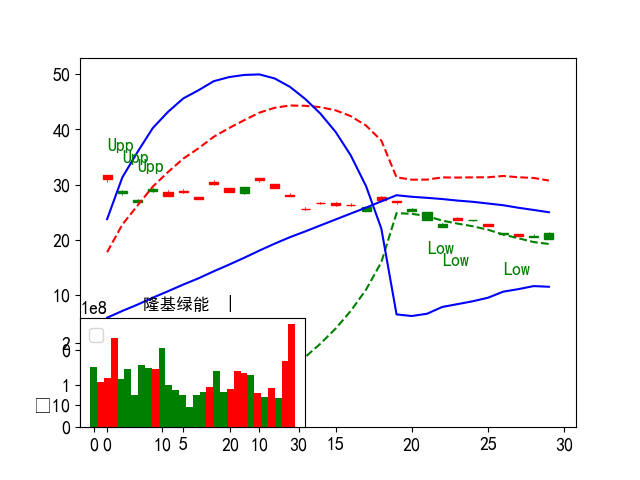

601099 1.46
lastb:0.0 xratio:0.05 ra_diff:1.46


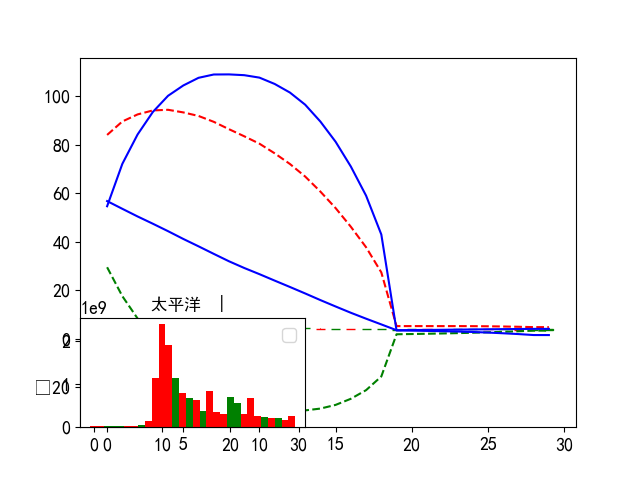

000725 1.0
lastb:0.0 xratio:-0.01 ra_diff:1.0


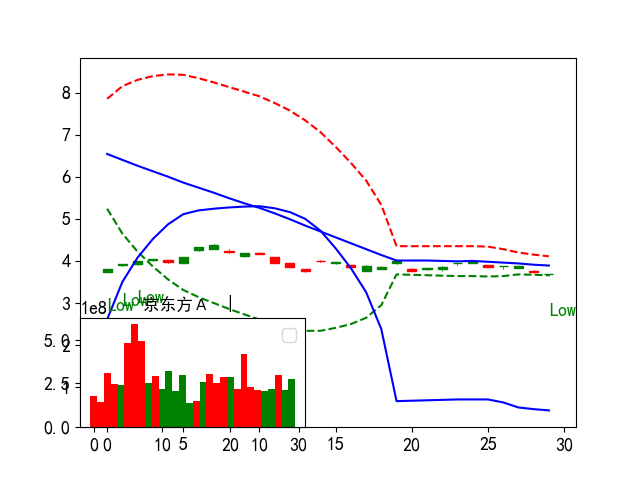

601288 1.11
lastb:0.0 xratio:0.01 ra_diff:1.11


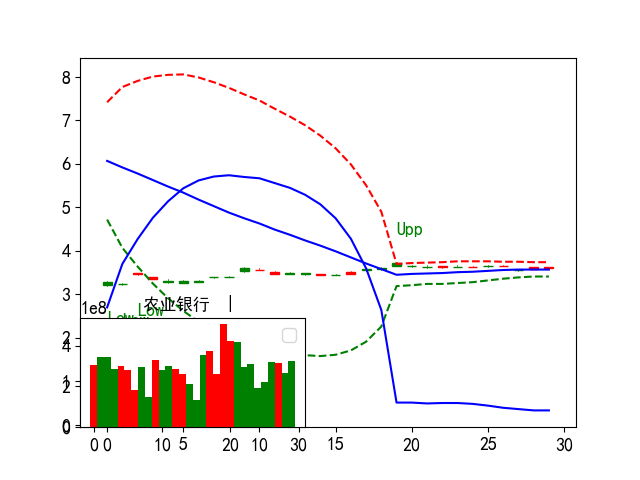

002640 1.25
lastb:0.0 xratio:0.02 ra_diff:1.25


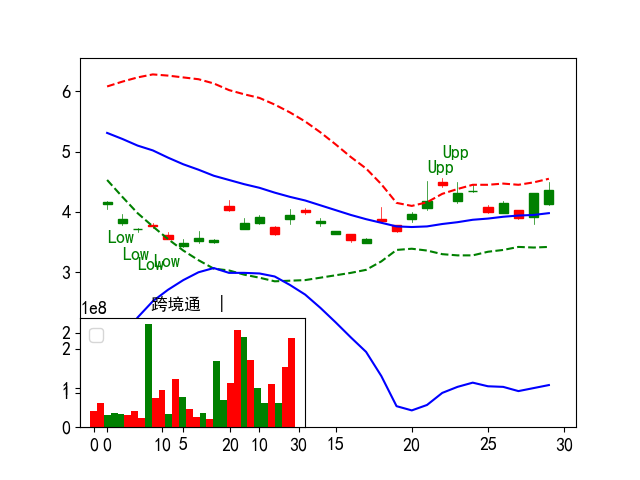

In [45]:
for co in top20_nd.index[:10]:
    print(co,dfNow.loc[co].ra_diff[-1])
    # show_ohlc_upper(dfs.loc[co][-30:],co)
    show_ohlc_upper(dfNow.loc[co][-30:],co)

In [46]:
code_df = '600519'
dfNow_t2 = dfNow.groupby(level=[0]).tail(2)
# dfNow_f = dfNow_t2[ (dfNow_t2.idx > dfNow_t2.idx.shift(1)) & (dfNow_t2.xratio > dfNow_t2.xratio.shift(1)) ]
idx = pd.IndexSlice
mask_df =  ((dfNow_t2.idx > dfNow_t2.idx.shift(1)) & (dfNow_t2.xratio > dfNow_t2.xratio.shift(1)) )

dfNow_t2 = dfNow_t2.loc[idx[mask_df, :]]

group250 = dfNow_t2.groupby(level=[0])
dfNow_f = group250.tail(1).reset_index().set_index('code')
mask_df = (dfNow_f.date >= cct.get_today())
dfNow_f = dfNow_f.loc[idx[mask_df, :]]
dfNow_f[:2]

date   open  high    low  close        vol      amount  ra_diff  \
code                                                                           
689009 2023-12-22  31.42  31.7  30.85  31.03  2973299.0  92507952.0     1.01   
688800 2023-12-22  38.30  39.0  37.07  38.75  1604256.0  60856906.0     1.01   

          ma5   ma10  ...  perc5d  vol1d  vol2d   vol3d  vol4d   vol5d  \
code                  ...                                                
689009  32.95  33.19  ...   -7.12  -7.62 -83.59  221.79 -43.65  447.42   
688800  41.64  41.37  ...  -16.52  46.44 -28.67   41.99 -21.44  -54.07   

        volsum5d  ma51d  xratio   idx  
code                                   
689009     534.4  32.95   -0.04 -2.11  
688800     -15.8  41.64   -0.53 -1.82  

[2 rows x 31 columns]

In [47]:
# dfNow_f.shape,dfNow_f[:3],dfNow_t2.loc['600812'],df.loc['600812'][-2:]
# dfNow_f[dfNow_f.date >= cct.get_today()]
# dfNow_f.loc['000006']
# dfNow_t2.loc['000006']
# (dfNow_t2.loc[code_df].idx > dfNow_t2.loc[code_df].idx.shift(1)) 
# (dfNow_t2.loc[code_df].xratio > dfNow_t2.loc[code_df].xratio.shift(1))
# dfNow_f.loc[code_df],dfNow.loc[code_df]

### pandas multiinde drop last row

In [48]:
df.loc['000002'][-2:]

open   high    low  close         vol        amount  ra_diff
date                                                                     
2023-12-15  10.63  10.81  10.60  10.64  88446501.0  9.469991e+08     1.02
2023-12-22  10.20  10.44  10.18  10.42  55284133.0  5.728430e+08     1.00

In [49]:
dfNow.loc['000002'][-2:]

open   high    low  close         vol        amount  ra_diff  \
date                                                                        
2023-12-15  10.63  10.81  10.60  10.64  88446501.0  9.469991e+08     1.02   
2023-12-22  10.20  10.44  10.18  10.42  55284133.0  5.728430e+08     1.00   

              ma5   ma10   ma20  ...  perc5d  vol1d  vol2d  vol3d  vol4d  \
date                             ...                                       
2023-12-15  11.31  11.56  12.68  ...  -10.51  79.40 -25.91 -37.94  67.76   
2023-12-22  11.07  11.34  12.47  ...  -10.33 -37.49  79.40 -25.91 -37.94   

            vol5d  volsum5d  ma51d  xratio   idx  
date                                              
2023-12-15  -9.58      73.7  11.31   -0.14 -1.95  
2023-12-22  67.76      45.8  11.07   -0.15 -1.24  

[2 rows x 30 columns]

# 基础处理

In [50]:
# show_tdx_data(dfs.loc['600519'][-2:])
dfs = dfNow.fillna(0)
groupd = dfs.groupby(level=[0])
single = False
dt_low = None
df_idx = None
if single:
    dfs_dtlen = groupd.tail(1)
    print("dfs tail1")
else:
    single = True
    dl = 30
    dindex = tdd.get_tdx_Exp_day_to_df(
        '999999', dl=dl, resample=resample).sort_index(ascending=False)
    dt = tdd.get_duration_price_date('999999', df=dindex)

    dt = dindex[dindex.index >= dt].index.values
    dt_low = dt[-1]
    print('dt_low:%s %s' % (dt_low,dt[0]))
    dtlen = len(dt) if len(dt) > 0 else 1
    dfs_dtlen = groupd.tail(dtlen)
    # import ipdb;ipdb.set_trace()
    dfs_dtlen[-2:]
    df_idx = get_groupby_mean_median_close(dfs_dtlen)

    # print(("dfs tail:%s dt:%s" % (dtlen, dt)))
    dfs_dtlen = get_multi_date_duration(dfs_dtlen, dt[-1])

# groupd2 = dfs.groupby(level=[0])
# dfs['ma%d'%cumdays] = groupd['close'].apply(pd.rolling_mean, cumdays)

# dfs.reset_index().groupby(['code'])['date'].transform('count')
# single = True

print("Low:%s" % (dt[-1]))
# dfs_dtlen.loc['999999'].reset_index().date
lastday_week = dfs_dtlen.loc['999999'].reset_index().date[0]
lastday_week
# dfs_dtlen[('ma%s') % (rollma[-1])][-2:]
# print(df_idx)

dt_low:2023-12-21 2023-12-21


open   high    low  close          vol        amount  \
code   date                                                                
000002 2023-12-22  10.20  10.44  10.18  10.42   55284133.0  5.728430e+08   
000001 2023-12-22   9.01   9.19   8.99   9.17  101704676.0  9.254071e+08   

                   ra_diff    ma5   ma10   ma20  ...  perc5d  vol1d  vol2d  \
code   date                                      ...                         
000002 2023-12-22      1.0  11.07  11.34  12.47  ...  -10.33 -37.49  79.40   
000001 2023-12-22      1.0   9.49   9.94  10.68  ...   -9.66   2.84  -3.15   

                   vol3d  vol4d  vol5d  volsum5d  ma51d  xratio   idx  
code   date                                                            
000002 2023-12-22 -25.91 -37.94  67.76      45.8  11.07   -0.15 -1.24  
000001 2023-12-22  31.24  13.64 -24.21      20.4   9.49   -0.11 -1.43  

[2 rows x 30 columns]

Low:2023-12-21


Timestamp('2023-12-22 00:00:00')

In [51]:
time_s = time.time()
# rollma

def get_mask_df(dfs):
    dfs = dfs.fillna(0)
    idx = pd.IndexSlice
    # mask = (dfs[('ma%s')%(rollma[0])] > dfs[('ma%s')%(rollma[1])]) & (dfs[('ma%s')%(rollma[-1])] > 0) & (dfs[('close')] > dfs[('ma%s')%(rollma[0])])  & (dfs[('close')] > dfs[('ma%s')%(rollma[-1])])
    # mask = (dfs[('ma%s')%(rollma[0])] > dfs[('ma%s')%(rollma[1])]) & (dfs[('ma%s')%(rollma[-1])] > 0) & (dfs[('close')] > dfs[('ma%s')%(rollma[1])])  & (dfs[('close')] > dfs[('ma%s')%(rollma[-1])])
    # mask = (dfs[('ma%s')%(rollma[0])] > dfs[('ma%s')%(rollma[1])]) & (dfs[('ma%s')%(rollma[-1])] > 0) &  (dfs[('close')] > dfs[('ma%s')%(rollma[-1])])

    # mask = ( (dfs[('ma%s')%(rollma[0])] > 0) & (dfs[('ma%s')%(rollma[-1])] > 0) & (dfs[('close')] > dfs[('ma%s')%(rollma[-1])]) & (dfs[('close')] > dfs[('ma%s')%(rollma[0])]))
    # mask = ( (dfs[('ma%s')%(rollma[0])] > 0) & (dfs[('ma%s')%(rollma[-1])] > 0)
    #         & (dfs[('close')] > dfs[('ma%s')%(rollma[-1])]*ma_250_l)
    #         & (dfs[('close')] < dfs[('ma%s')%(rollma[-1])]*ma_250_h)
    #         & (dfs[('close')] > dfs[('ma%s')%(rollma[0])]))

    # & (dfs['mean'] > dfs['median'])
    # & (dfs['close'] > dfs['mean'])

    if len(rollma) > 1:

        mask = ((dfs[('ma%s') % (rollma[0])] > 0) & (dfs[('ma%s') % (rollma[-1])] > 0) &
                (dfs[('ma%s') % (rollma[0])] > dfs[('ma%s') % (rollma[-1])]) &
                (dfs[('close')] > dfs[('ma%s') % (rollma[0])]) &
                (dfs[('close')] > dfs[('ma%s') % (rollma[-1])]*ma_250_h) &
                ((dfs[('close')] > dfs['boll']) | (dfs[('close')] > dfs['upper']))
                )
    else:
        mask = ((dfs[('ma%s') % (rollma[0])] > 0) &
                (dfs[('close')] > dfs[('ma%s')%(rollma[0])]) &
                ((dfs[('close')] > dfs['boll']) | (dfs[('close')] > dfs['upper']) )
                )

    return dfs.loc[idx[mask, :]]

# mask = ((dfs[('close')] > dfs[('ma%s')%(rollma[-1])]))


df_mask = get_mask_df(dfs_dtlen)
print(df_mask.shape)
df_mask = get_multi_code_count(df_mask)
print((df_mask.couts[:5], df_mask.shape))

# import ipdb;ipdb.set_trace()
# df.sort_values(by='couts',ascending=0)
# groupd.first()[:2],groupd.last()[:2]
# groupd = df250.groupby(level=[0])
# '''
# groupd.transform(lambda x: x.iloc[-1])
# groupd.last()
# groupd.apply(lambda x: x.close > x.ma250)
# df.shape,df.sort_index(ascending=False)[:5]
# ?groupd.agg
# groupd = df.groupby(level=[0])
# groupd['close'].apply(pd.rolling_mean, 250, min_periods=1)
# ex:# Group df by df.platoon, then apply a rolling mean lambda function to df.casualties
# df.groupby('Platoon')['Casualties'].apply(lambda x:x.rolling(center=False,window=2).mean())

code_uniquelist = df_mask.index.get_level_values('code').unique()
code_select = code_uniquelist[random.randint(0, len(code_uniquelist) - 1)]

# if app:
#     print(round(time.time() - time_s, 2), 's', df.index.get_level_values(
#         'code').unique().shape, code_select, df.loc[code_select][-1:])

if single:
    # groupd = df.groupby(level=[0])
    if tdx:
        # block_path = tdd.get_tdx_dir_blocknew() + '060.blk'
        # if cct.get_work_time():
        #     codew = df[df.date == cct.get_today()].index.tolist()

        if dt_low is not None:

            groupd2 = df_mask.groupby(level=[0])
            df_mask = groupd2.tail(1)
            df_mask = df_mask.reset_index().set_index('code')
            # import ipdb;ipdb.set_trace()

            # df = df[(df.date >= dt_low) & (df.date <= cct.get_today())]
            dd = df_mask[(df_mask.date == dt_low)]
            # df = df[(df_mask.date >= cct.last_tddate(1))]
            df_mask = df_mask[(df_mask.date >= df_mask.date.max())]
            # import ipdb;ipdb.set_trace()
            print(("dt_low:%s df:%s %s df_idx:%s" %
                  (dt_low,len(df_mask), df_mask.index[:5], len(df_idx))))


                
            print(("Main Down dd :%s MainUP df:%s couts std:%0.1f " %
                  (len(dd), len(df_mask), df_mask.couts.std())))
            # print df.date.mode()[0]
            if len(df_mask) > 0:
                if df_idx is not None and len(df_mask) > 0 and len(df_idx) > 0:
                    idx_set_ = [x for x in df_idx.index if x in df_mask.index]
                    # df_mask = df_mask.loc[idx_set_, :].dropna()
                df_mask = df_mask.sort_values(by='couts', ascending=1)
                df_mask = df_mask[df_mask.couts > df_mask.couts.std()]
            else:
                print("df_mask is None:%s"%(len(df_mask)))
            # df = df[(df.date >= df.date.mode()[0]) & (df.date <= cct.get_today())]
            codew = df_mask.index.tolist()

            if app:
                print(
                    "time: %s  %s" %
                    (round(time.time() - time_s, 2), len(df_mask)))

        else:
            df_mask = df_mask.reset_index().set_index('code')
            df_mask = df_mask[(df_mask.date >= cct.last_tddate(days=10)) &
                              (df_mask.date <= cct.get_today())]
            codew = df_mask.index.tolist()

        top_temp = tdd.get_sina_datadf_cnamedf(codew, df_mask)
        top_temp = top_temp[(~top_temp.index.str.contains(
            '688')) & (~top_temp.name.str.contains('ST'))]
        top_temp = top_temp.sort_values(by=['couts'], ascending=[0])
        codew = top_temp.index.tolist()

        # clean st and 688

    # df['date'] = df['date'].apply(lambda x:(x.replace('-','')))
    # df['date'] = df['date'].astype(int)
    # print df_mask.loc[code_select].T,df_mask.shape
#     MultiIndex = False
# else:
#     MultiIndex = True

(69, 30)
count dd.couts
(code    date      
688685  2023-12-22    1
688577  2023-12-22    1
688506  2023-12-22    1
688328  2023-12-22    1
688301  2023-12-22    1
Name: couts, dtype: int64, (69, 31))
dt_low:2023-12-21 df:69 Index(['688685', '688577', '688506', '688328', '688301'], dtype='object', name='code') df_idx:0
Main Down dd :0 MainUP df:69 couts std:0.0 
time: 0.01  69
lastb:0.0 

In [52]:
dfs_dtlen.loc['002987'][-1:]

open   high    low  close        vol       amount  ra_diff  \
date                                                                      
2023-12-22  18.41  18.78  18.24   18.6  3110666.0  57445534.76     1.04   

              ma5   ma10   ma20  ...  perc5d  vol1d  vol2d  vol3d  vol4d  \
date                             ...                                       
2023-12-22  19.24  18.98  19.41  ...   -7.97 -13.84 -33.82  15.78 -29.59   

            vol5d  volsum5d  ma51d  xratio   idx  
date                                              
2023-12-22 -48.43    -109.9  19.24    -0.1  0.76  

[1 rows x 30 columns]

## 最近30天筛选

In [53]:
# 截取最后5天数据
dfs_tail = dfs.groupby(level=[0]).tail(30)
# 还原多索引
# dfs_tail = dfs_tail.reset_index().set_index(['code','date'])
# dfs_tail[dfs_tail.ra_diff > 2]

### filter mask250 get_level_values

In [54]:
mask250 = ((dfs_tail[('ma%s') % (rollma[0])] > 0) & (dfs_tail[('ma%s') % (rollma[-1])] > 0) &
           (dfs_tail[('close')] > dfs_tail[('ma%s') % (rollma[0])])
            & (dfs_tail[('close')] > dfs_tail[('ma%s') % (rollma[-1])]*1.03)
              & (dfs_tail[('close')] < dfs_tail[('ma%s') % (rollma[-1])]*1.1)
                & (dfs_tail[('close')] > dfs_tail[('ma20')])
           & (dfs_tail[('close')] < dfs_tail[('ma20'   )]*1.1))
idx = pd.IndexSlice
df_mask250 = dfs_tail.loc[idx[mask250, :]]
print(df_mask250.shape)
df_mask250 = get_multi_code_count(df_mask250)
print((df_mask250.couts[:1], df_mask250.shape))

groupd250 = df_mask250.groupby(level=[0])
df_mask250 = groupd250.tail(1)
# df_mask250 = df_mask250[df_mask250.index.get_level_values(1) > str(df_mask250.loc['999999'].index[0])[:10] ]
# df_mask250 = clean_688(df_mask250)

# df_mask250['idx'] = df_idx_detect
print((df_mask250.couts[:2], df_mask250.shape))
# print(df_mask.loc['002987'])
df_mask250 = df_mask250.sort_values(
        by=['ra_diff','hat', 'couts'],
        ascending=[0,0, 0])
show_tdx_data(
    df_mask250)[:3]

(9564, 30)
count dd.couts
(code    date      
300387  2023-05-26    14
Name: couts, dtype: int64, (9564, 31))
(code    date      
300640  2023-12-22    14
300387  2023-12-22    14
Name: couts, dtype: int64, (3037, 31))
Count:3037 31


couts  ra_diff  xratio  idx   hat  close  volsum5d  hmax  \
code   date                                                                   
600432 2017-04-21      3     6.52     0.0  0.0  2.09   6.98     163.6  7.38   
600290 2023-09-22      1     3.51     0.0  0.0  0.51   1.44     107.1  1.76   
600260 2022-10-21      2     2.97     0.0  0.0  0.79   2.88      91.6  3.27   

                   lmin  perc1d  ma20  vol1d   vol2d   vol3d  vol4d  vol5d  \
code   date                                                                  
600432 2017-04-21  5.67   -2.38  6.57 -24.81  171.16  104.90 -35.72 -51.96   
600290 2023-09-22  1.17    0.70  1.38  96.67   29.92   48.96  -2.88 -65.53   
600260 2022-10-21  2.35    2.86  2.75  67.52   39.87  -46.78 -21.76  52.71   

                   perc3d  perc5d  
code   date                        
600432 2017-04-21    6.56   -3.19  
600290 2023-09-22    3.60   -2.04  
600260 2022-10-21   10.34   16.60

#### filter today

In [55]:
df_mask250  = df_mask250[(df_mask250.xratio > 0) & (df_mask250.index.get_level_values('date') > cct.get_today() )]
# df_tail1[df_tail1.index.get_level_values('date') == cct.get_today()].shape


In [56]:
# df_mask250.index.get_level_values(1) > str(df_mask250.loc['999999'].index[0])[:10]

#### debug ra_diff4

In [57]:
dfs.loc['301073'][-5:].ra_diff

date
2023-11-24    1.11
2023-12-01    1.15
2023-12-08    1.03
2023-12-15    1.03
2023-12-22    1.00
Name: ra_diff, dtype: float64

lastb:0.0 xratio:-0.11 ra_diff:1.0


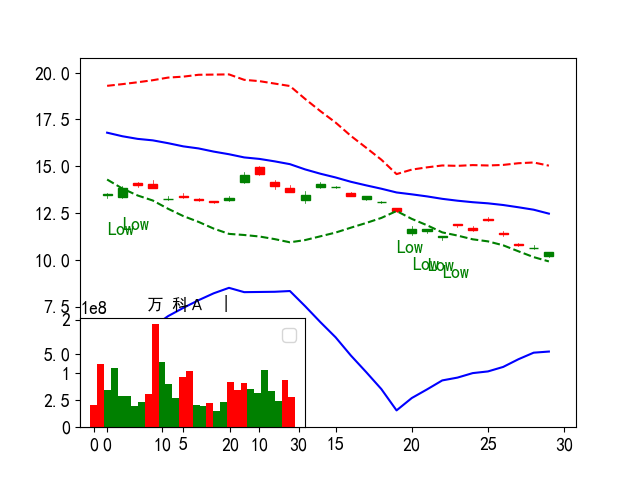

600719 1.69
lastb:0.0 xratio:0.08 ra_diff:1.69


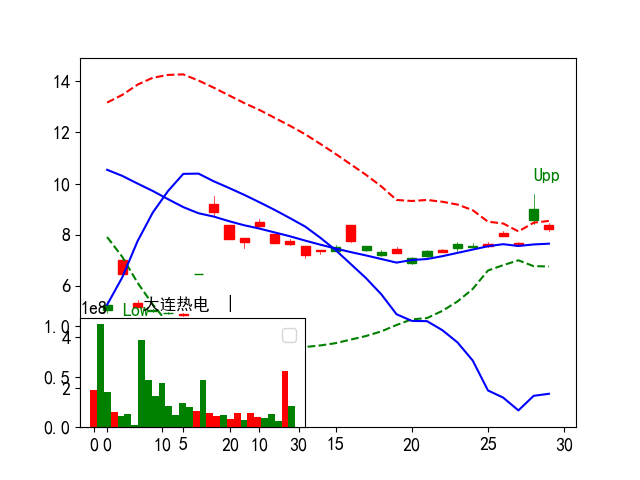

000889 1.52
lastb:0.0 xratio:0.01 ra_diff:1.52


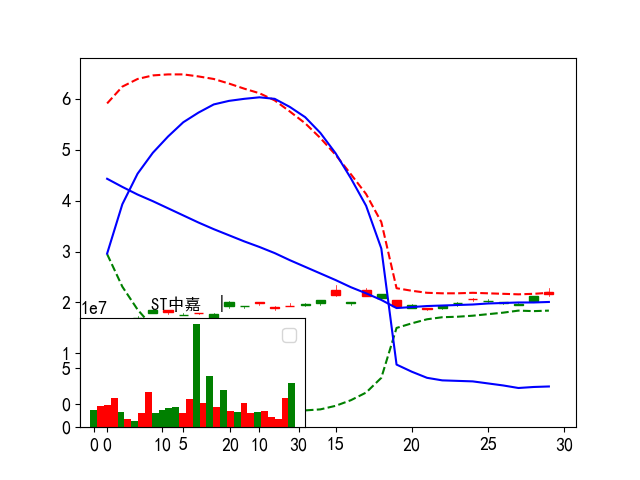

600234 1.45
lastb:0.0 xratio:0.06 ra_diff:1.45


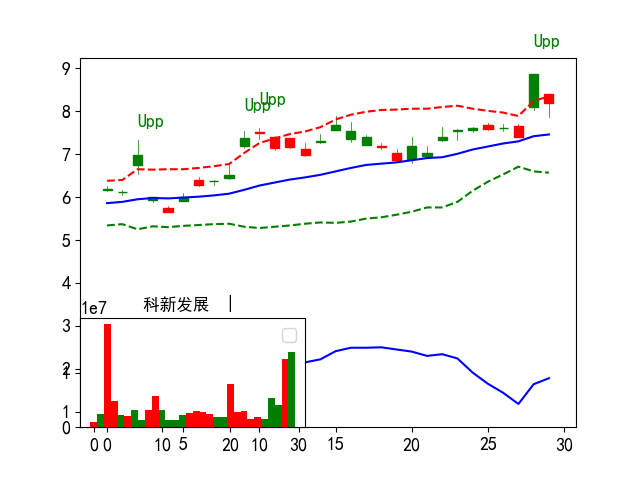

603221 1.4
lastb:0.0 xratio:0.09 ra_diff:1.4


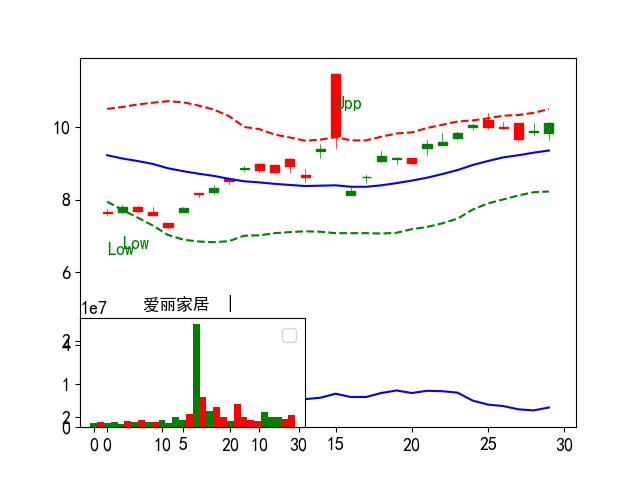

002615 1.4
lastb:0.0 xratio:0.04 ra_diff:1.4


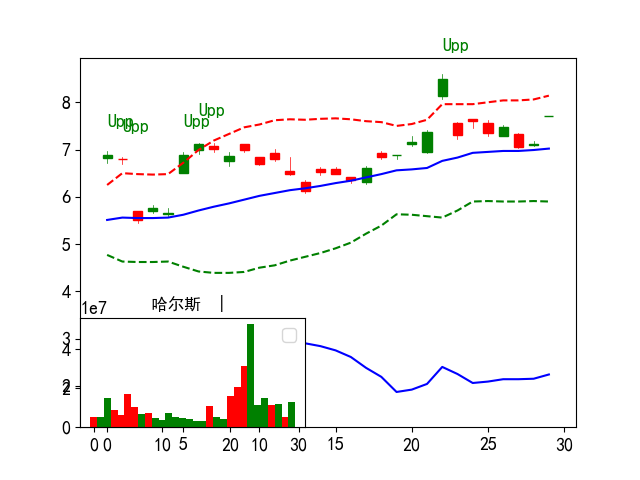

603709 1.38
lastb:0.0 xratio:0.14 ra_diff:1.38


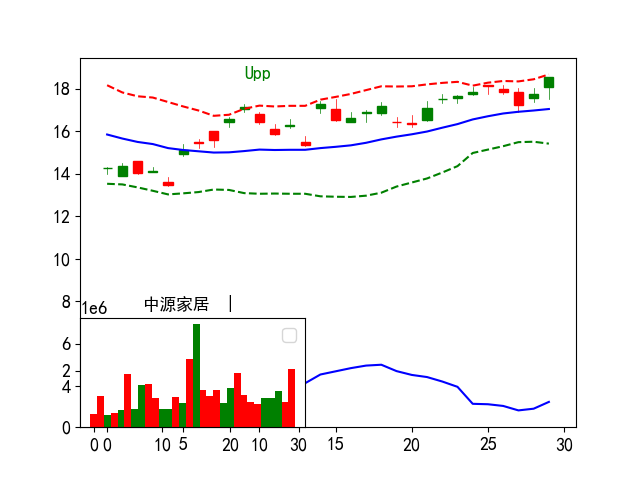

688188 1.36
lastb:0.0 xratio:1.82 ra_diff:1.36


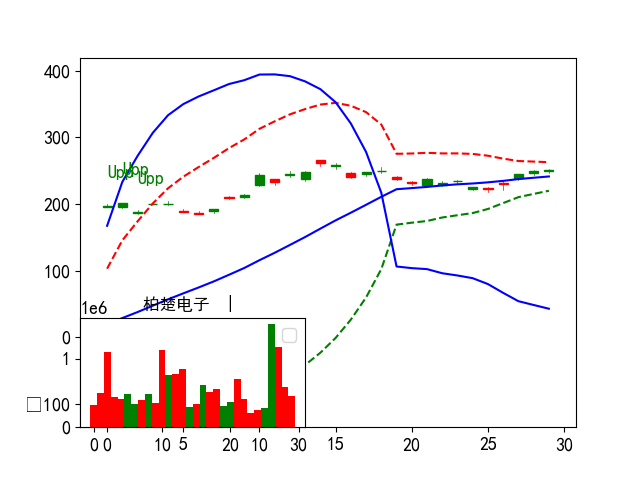

600546 1.36
lastb:0.0 xratio:0.16 ra_diff:1.36


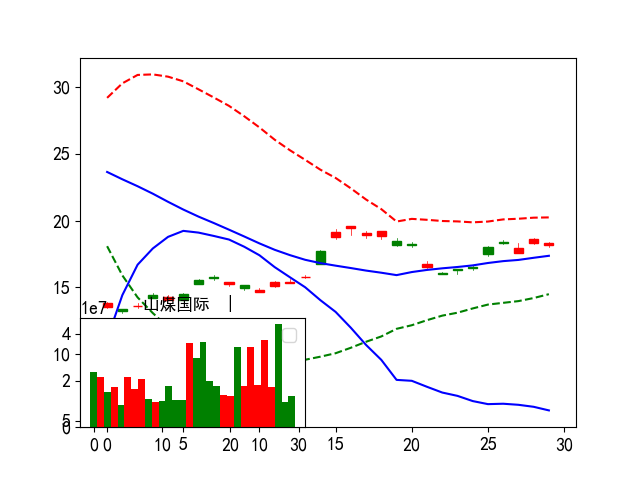

601188 1.34
lastb:0.0 xratio:0.04 ra_diff:1.34


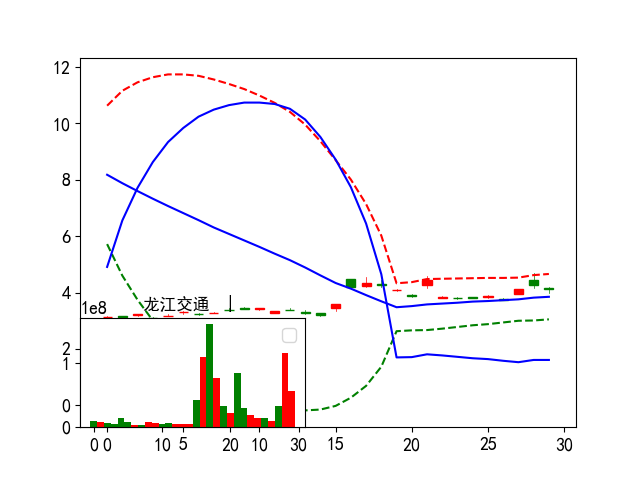

300583 1.33
lastb:0.0 xratio:0.15 ra_diff:1.33


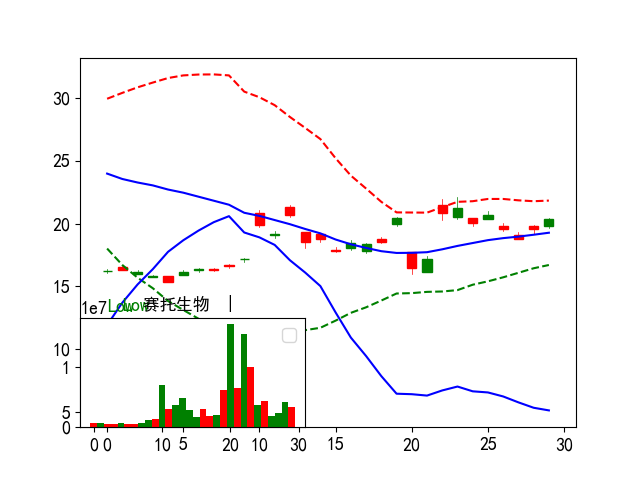

In [58]:
# dfs.loc['000002'][-60:]
show_ohlc_upper(dfs.loc['000002'][-60:],code='000002')
for co in df_mask250.index.get_level_values(0)[:10]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfs.loc[co][-60:],code=co)

## 最近15天数据

In [59]:
dfs_tail9 = dfs.groupby(level=[0]).tail(15)

# 提取倒数第二天
# dfs_tail9 = dfs.groupby(level=[0]).tail(6)
# dfs_tail9 = dfs_tail9[dfs_tail9.index.get_level_values(1) <lastday]


# dfs_tail9.index.get_level_values(0)
# 还原多索引
# dfs_tail = dfs_tail.reset_index().set_index(['code','date'])
# print(dfs_tail9.loc['002987'][:1])
# show_tdx_data(dfs_tail9.loc[code_t])
# dfs_tail9=compute_perd_value(dfs_tail9,market_value=5,col='vol')

# show_tdx_data(dfs_tail9.loc[code_t])
# print((dfs_tail9.loc[code_t]))

In [60]:
dfs_tail9.loc[(['999999','399001','399006'],'ra_diff')].groupby(level=0).tail(3)
# dfs_tail9.loc[pd.IndexSlice[['999999','399001','399006'], :, :]].tail(3)
# dfs_tail9.query(("code == '999999'" and "date > '2023-04-01'"))

code    date      
999999  2023-12-08    1.02
        2023-12-15    1.01
        2023-12-22    1.00
399001  2023-12-08    1.03
        2023-12-15    1.02
        2023-12-22    1.00
399006  2023-12-08    1.03
        2023-12-15    1.01
        2023-12-22    1.00
Name: ra_diff, dtype: float64

## 超跌反弹年线大于MA20

In [61]:
# show_tdx_data(dfs_tail9.loc['300418'])[-2:]
show_tdx_data(dfs_tail9.loc['603131'])[-2:]
# print(dfs_tail9.loc['603131',['high','upper','hmax']])

Count:15 30


ra_diff  xratio   idx   hat  close  volsum5d   hmax   lmin  \
date                                                                     
2023-12-15     1.28    0.18 -0.96  7.25  14.65    -109.8  19.77  11.81   
2023-12-22     1.27    0.16 -3.78  7.11  14.55     -19.8  19.77  11.81   

            perc1d   ma20  vol1d  vol2d  vol3d  vol4d  vol5d  perc3d  perc5d  
date                                                                          
2023-12-15   -0.48  14.71 -25.84 -26.50  -9.07 -36.83 -11.52   -7.16   -10.4  
2023-12-22   -0.68  14.78  78.47 -25.84 -26.50  -9.07 -36.83   -8.43   -13.8

## !!! Run-Filter强势Upper

### !!! filterRule test

In [90]:
# dfs_tail9.loc['002722']


def rules_to_list(rules):
    rules_l = (rules).split('&')
    for l in rules_l:
        print(l)
    return rules_l


def filter_rule_Test(dfs_tail9,resample=resample):
    col_rule = ["(dfs_tail9[('close')] > dfs_tail9[('ma5')])",
                "(dfs_tail9[('high')] > dfs_tail9.upper)",
                "(dfs_tail9[('ma5')] > dfs_tail9[('ma20')])"]
    col_rule2 = [
        "(dfs_tail9[('close')] > dfs_tail9[('hmax')].shift(1)*0.98) | (dfs_tail9['close'] > dfs_tail9['hmax']*0.97)",
        "((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift(1)*0.99))"]
    col_rule3 = [
        "((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))"]

    col_rule_tail1 = ["(dfs_tail9.perc1d < 21)", "(dfs_tail9.perc2d > 0)"]
    if resample.upper()=='D':
        col_rule_tail2 = [
            "((dfs_tail9.perc3d > 0) | ((dfs_tail9.close.shift(2) > dfs_tail9.ma5.shift(2))) )",
            "((dfs_tail9.volsum5d > 50) )",
            "(dfs_tail9['close'] > dfs_tail9[('hmax')])",
            "(dfs_tail9[('close')] > dfs_tail9[('ma250')])",
            "(dfs_tail9['low'] > dfs_tail9[('low')].shift(1))"]
        col_rule_tail3 = ["(dfs_tail9[('hmax')] > 0)",
                 "(dfs_tail9[('high')] >= dfs_tail9[('hmax')])",
                 "(dfs_tail9[('close')] > dfs_tail9.ma250 * 0.99)"]
    else:
        col_rule_tail2 = [
            "((dfs_tail9.perc3d > 0) | ((dfs_tail9.close.shift(2) > dfs_tail9.ma5.shift(2))) )",
            "((dfs_tail9.volsum5d > 50) )",
            "(dfs_tail9['close'] > dfs_tail9[('hmax')])",
            "(dfs_tail9['low'] > dfs_tail9[('low')].shift(1))"]
        col_rule_tail3 = ["(dfs_tail9[('hmax')] > 0)",
                 "(dfs_tail9[('high')] >= dfs_tail9[('hmax')])"]
    col_rule_tail4=[ "(dfs_tail9[('xratio')] > dfs_tail9[('xratio')].shift(1))",
             "(dfs_tail9[('xratio')].shift(1) > dfs_tail9[('xratio')].shift(2))"]
    
    col_rule.extend(col_rule2)
    col_rule.extend(col_rule3)
    col_rule.extend(col_rule_tail1)
    col_rule.extend(col_rule_tail2)
    col_rule.extend(col_rule_tail3)
    col_rule.extend(col_rule_tail4)
    
    for co in col_rule:
        print("%s:%s" % (co, eval(co)), end='')



9 -0.06 -0.58


'Bear'

-0.58

date
2023-11-24   -0.02
2023-12-01   -0.02
2023-12-08   -0.02
2023-12-15   -0.02
2023-12-22   -0.03
Name: xratio, dtype: float64

lastb:0.0 xratio:-0.02 ra_diff:1.02


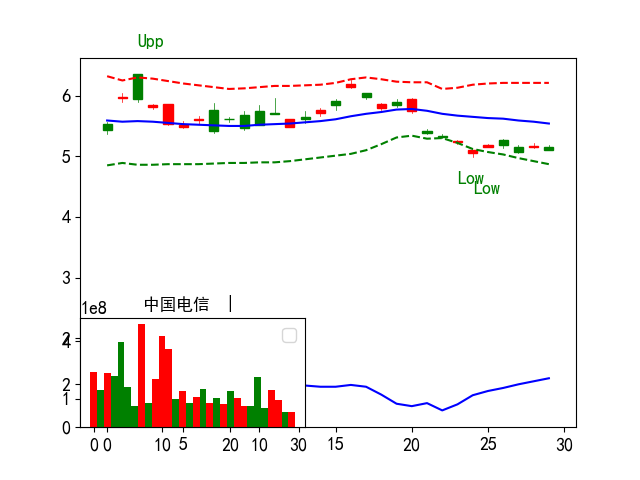

In [93]:
code_filter = '601728'


# show_tdx_data(dfs_tail9.loc[code_filter])
detect_bull_bear(dfs.loc[code_filter][-120:].close)
detect_bull_bear_apply(dfs.loc[code_filter][-120:].close)

dfs.loc[code_filter].xratio[-5:]

# filter_rule_Test(dfs_tail9.loc[code_filter])

show_ohlc_upper(dfs.loc[code_filter][-60:], code=code_filter)



In [64]:
# dfs.loc['300474'][-5:]

### 新高Hmax日见新高df_mask_hmax

#### hmax 追高

lastb:0.0 xratio:-0.02 ra_diff:1.19


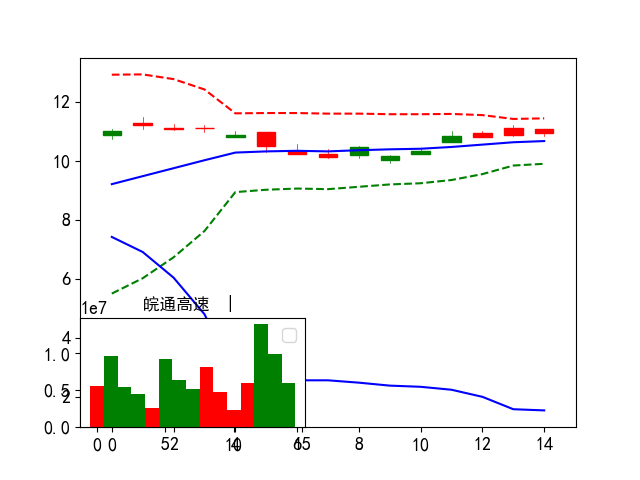

In [65]:
code='600012'
# show_tdx_data(dfs_tail9.loc[code],col='upper')
show_ohlc_upper(dfs_tail9.loc[code],code=code)

In [66]:

# mask_hmax = ((dfs_tail9[('close')] > dfs_tail9[('hmax')].shift(
#     1) * 0.99) | (dfs_tail9['close'] > dfs_tail9['hmax'] * 0.99))

# mask_hmax = ( (dfs_tail9[('hmax')] > 0) & ((dfs_tail9[('high')] > dfs_tail9[('hmax')].shift(
#     1) * 0.99) | (dfs_tail9['high'] > dfs_tail9['hmax'] * 0.99)) )

# mask_hmax = ((dfs_tail9[('hmax')] > 0) &

if resample.upper() =='D':
    mask_hmax = ( (dfs_tail9[('high')] > dfs_tail9[('hmax')].shift(1)) &
                 ((dfs_tail9[('high')] >= dfs_tail9[('hmax')])) &
                 (dfs_tail9[('close')] > dfs_tail9.ma250 * 0.99))
                 # (dfs_tail9[('close')] > dfs_tail9.ma250 * 0.99) &
                 # (dfs_tail9[('close')] < dfs_tail9.ma250 * 1.05))
else:
    mask_hmax = ( (dfs_tail9[('low')] >= dfs_tail9[('ma5')].shift(1))  &
              (dfs_tail9[('high')] >= dfs_tail9[('high')].shift(1))  ) 

# mask_hmax = ( (dfs_tail9[('hmax')] > 0) & (dfs_tail9[('close')] > dfs_tail9.ma20 *0.99) & (dfs_tail9[('close')] < dfs_tail9.ma20 *1.20) )


df_mask_hmax = dfs_tail9.loc[idx[mask_hmax, :]]
df_mask_hmax = get_multi_code_count(df_mask_hmax)

# df_mask_hmax = df_mask_hmax[ (df_mask_hmax[('close')] > df_mask_hmax.upper)]

# df_mask_hmax.couts.std()

df_mask_hmax = df_mask_hmax.groupby(level=[0]).tail(
    1).reset_index().set_index('code')

df_mask_hmax = df_mask_hmax[df_mask_hmax.date >= lastday]
# df_mask_hmax = get_sina_data_cname(df_mask_hmax, dm,realtime=True)
df_mask_hmax = get_sina_data_cname(df_mask_hmax, realtime=True)

df_mask_hmax = clean_688(df_mask_hmax)

# show_tdx_data(df_mask_hmax[df_mask_hmax.couts == 9])

# by=['perc', 'perc5d', 'perc1d'],
# code_t = '000534'
df_mask_hmax = df_mask_hmax.sort_values(
    by=['couts','volsum5d', 'idx', 'hat', 'perc1d'],ascending=[0,0, 0, 0, 0])
    # by=['volsum5d', 'idx', 'hat', 'perc1d'],ascending=[0, 0, 0, 0])
# print(df_mask_hmax.couts[:1], df_mask_hmax.shape)
# show_tdx_data(df_mask_hmax.loc['300461'])
df_mask_hmax.couts[:1], df_mask_hmax.shape
show_tdx_data(df_mask_hmax)[:10]
# show_tdx_data(df_mask_hmax[(df_mask_hmax.couts > 1) & (df_mask_hmax.volsum5d > 10) & (df_mask_hmax.volsum5d < 150)]).T

count dd.couts
compute percent


(code
 600985    12
 Name: couts, dtype: int64,
 (265, 40))

Count:265 40


name  couts       date   perc  ra_diff  xratio    idx    hat  close  \
code                                                                          
600985  淮北矿业     12 2023-12-22  -1.02     1.47    0.20   2.69   6.29  16.46   
603201  常润股份     11 2023-12-22   5.91     1.38    0.23   4.48   7.70  28.15   
603358   NaN     11 2023-12-22    NaN     1.55    0.21   6.66  10.60  23.16   
002806  华锋股份     11 2023-12-22   1.73     1.32    0.06   2.88   3.88  14.08   
605289  罗曼股份     11 2023-12-22  -1.92     1.87    0.38  19.31  25.60  52.60   
301019  宁波色母     11 2023-12-22  -0.63     1.23    0.11   2.92   4.10  23.80   
603322  超讯通信     10 2023-12-22   0.85     1.78    0.67   4.48  23.54  37.95   
002295  精艺股份     10 2023-12-22   1.12     1.27    0.05   0.84   1.42   8.11   
603656  泰禾智能      9 2023-12-22  -6.30     1.34    0.06   3.12   3.61  15.77   
002494  华斯股份      9 2023-12-22  10.00     1.46    0.04   1.47   1.47   6.27   

        volsum5d  ...   ma20  nclose   llow   vol1d  vol2d  vol3d   vol4d  \
code              ...                                                       
600985      98.6  ...  13.94   16.43  16.30   75.64 -47.83  -8.06   18.39   
603201     904.4  ...  23.94   26.90  26.35  942.58 -59.18  54.30    8.96   
603358     582.5  ...  18.20     NaN  22.19   72.48 -40.54 -27.21  635.85   
002806     422.2  ...  12.04   13.93  13.65  -22.72 -13.89  35.78  483.81   
605289     239.4  ...  36.31   52.46  51.69  -19.28 -14.63   4.58  228.69   
301019     181.6  ...  21.85   23.46  23.07  -13.09 -40.72  99.07  162.06   
603322      61.1  ...  31.44   37.69  36.87   55.79 -19.90 -16.64  -43.42   
002295      48.8  ...   7.47    7.98   7.87   -4.96 -37.92  98.51   29.16   
603656     532.2  ...  13.17   16.13  15.61  491.89 -42.19  64.02   30.93   
002494     485.1  ...   5.16    6.27   5.73   84.68 -45.56 -26.32  412.25   

        vol5d  perc3d  perc5d  
code                           
600985  60.45    1.79   12.05  
603201 -42.31    8.06    8.81  
603358 -58.06    2.07   19.07  
002806 -60.73    7.15   11.75  
605289  40.08   42.24   33.54  
301019 -25.72    4.62    3.79  
603322  85.25    9.52    2.02  
002295 -36.04    3.18    4.38  
603656 -12.46   13.53   13.21  
002494  60.02   11.37   19.66  

[10 rows x 23 columns]

#### !!! hmax Top upper > 1

In [67]:
# dfs_tail9.loc['600103']

In [68]:
# mask_hmax = ((dfs_tail9[('close')] > dfs_tail9[('hmax')].shift(
#     1) * 0.99) | (dfs_tail9['close'] > dfs_tail9['hmax'] * 0.99))

# mask_hmax = ( (dfs_tail9[('hmax')] > 0) & ((dfs_tail9[('high')] > dfs_tail9[('hmax')].shift(
#     1) * 0.99) | (dfs_tail9['high'] > dfs_tail9['hmax'] * 0.99)) )

# mask_hmax = ( (dfs_tail9[('hmax')] > 0) & ((dfs_tail9[('high')] >= dfs_tail9[('hmax')]*0.99) ) )
# mask_hmax = (  (dfs_tail9[('high')] >= dfs_tail9[('hmax')]*0.99) )
if resample.upper() == 'D':
    mask_hmax = (  (dfs_tail9[('high')] >= dfs_tail9[('high')].shift(1)) & 
                 (dfs_tail9[('high')].shift(1) >= dfs_tail9[('high')].shift(2)) &
                (dfs_tail9[('high')] >= dfs_tail9[('hmax')]*0.99) &
                (dfs_tail9[('close')] >= dfs_tail9[('upper')].shift(1)) )
else:
    mask_hmax = (  (dfs_tail9[('high')] >= dfs_tail9[('high')].shift(1)) & 
                 (dfs_tail9[('high')].shift(1) >= dfs_tail9[('high')].shift(2)) &
                (dfs_tail9[('close')] >= dfs_tail9[('upper')].shift(1)) )

df_mask_hmax = dfs_tail9.loc[idx[mask_hmax, :]]

#站上Upper
# df_mask_hmax = df_mask_hmax[ (df_mask_hmax[('close')] > df_mask_hmax.upper)]

df_mask_hmax = get_multi_code_count(df_mask_hmax)
df_mask_hmax = df_mask_hmax.groupby(level=[0]).tail(
    1).reset_index().set_index('code')



df_mask_hmax = df_mask_hmax[df_mask_hmax.date >= lastday]
# df_mask_hmax = get_sina_data_cname(df_mask_hmax, dm,realtime=True)
df_mask_hmax = get_sina_data_cname(df_mask_hmax, realtime=True)

df_mask_hmax = clean_688(df_mask_hmax)

# show_tdx_data(df_mask_hmax[df_mask_hmax.couts == 9])

# by=['perc', 'perc5d', 'perc1d'],
# code_t = '000534'
df_mask_hmax = df_mask_hmax.sort_values(
    by=['volsum5d', 'idx', 'hat', 'perc1d'],
    ascending=[0, 0, 0, 0])
print(df_mask_hmax.couts[:1], df_mask_hmax.shape)
# show_tdx_data(df_mask_hmax.loc['000039'])
df_mask_hmax.couts[:1], df_mask_hmax.shape

# show_tdx_data(df_mask_hmax).T
# show_tdx_data(df_mask_hmax[(df_mask_hmax.couts > 1) & (df_mask_hmax.volsum5d > 10) & (df_mask_hmax.volsum5d < 150)])

show_tdx_data(df_mask_hmax[(df_mask_hmax.couts > 1)] )[:10]

count dd.couts
compute percent
code
002021    3
Name: couts, dtype: int64 (110, 40)


(code
 002021    3
 Name: couts, dtype: int64,
 (110, 40))

Count:70 40


name  couts       date   perc  ra_diff  xratio    idx    hat  close  \
code                                                                           
002021  *ST中捷      3 2023-12-22   4.67     2.12    0.02   0.94   1.21   3.14   
002862   实丰文化      2 2023-12-22 -10.00     1.43   -0.00   6.48   6.50  21.68   
002861   瀛通通讯      3 2023-12-22   2.50     1.53    0.16   4.68   5.65  16.37   
603201   常润股份      5 2023-12-22   5.91     1.38    0.23   4.48   7.70  28.15   
001314   亿道信息      2 2023-12-22   1.54     1.81    0.49  28.35  27.89  65.25   
002933   新兴装备      2 2023-12-22   2.22     1.33    0.19   8.32   8.55  35.38   
600805   悦达投资      2 2023-12-22   9.94     1.31    0.02   1.27   1.04   5.42   
301280   珠城科技      2 2023-12-22  -0.79     1.22    0.05   6.59   7.20  40.05   
601177   杭齿前进      2 2023-12-22   3.12     1.19   -0.07   1.62   1.69  10.26   
600348   华阳股份      2 2023-12-22   5.06     1.30    0.04   1.63   2.03   9.55   

        volsum5d  ...   ma20  nclose   llow   vol1d    vol2d   vol3d  vol4d  \
code              ...                                                         
002021    2239.5  ...   2.30    3.04   2.99  -43.38  2350.76  -84.87  68.11   
002862    1265.6  ...  17.19   22.33  21.68   24.51  1107.48  109.03   1.52   
002861    1107.6  ...  12.59   15.64  15.01   28.70    41.26  -47.18 -22.30   
603201     904.4  ...  23.94   26.90  26.35  942.58   -59.18   54.30   8.96   
001314     833.2  ...  41.86   62.11  59.45   89.50   -40.61  821.22 -25.24   
002933     758.3  ...  29.13   35.10  33.92    0.84   -34.32  809.92  -4.95   
600805     754.1  ...   4.54    5.29   4.81  690.47    -4.55   72.76  -6.45   
301280     711.6  ...  36.08   39.66  38.51    1.79    39.61  700.47 -37.47   
601177     681.2  ...   9.40    9.84   9.60   68.44   585.00   34.21 -11.29   
600348     554.6  ...   8.25    9.52   9.18  466.73   -25.17  -53.44  58.23   

          vol5d  perc3d  perc5d  
code                             
002021   -51.08   36.52   48.82  
002862    23.03   29.82   28.82  
002861  1107.16   16.85   24.02  
603201   -42.31    8.06    8.81  
001314   -11.67   61.91   59.54  
002933   -13.19   19.49   18.88  
600805     1.86   15.81   17.57  
301280     7.18    8.71    5.95  
601177     4.88   10.80    9.38  
600348   108.30    5.76   17.47  

[10 rows x 23 columns]

In [69]:
# show_tdx_data(df_mask_hmax.loc['600103'][-5:])

##### sort_values

In [70]:
show_tdx_data(
    df_mask_hmax.sort_values(
        by=['ra_diff', 'couts', 'idx'],
        ascending=[0, 0, 0]),col='ra_diff')[:20]

Count:110 40


name  couts       date   perc  ra_diff  ra_diff  xratio    idx  \
code                                                                      
002786   银宝山新      4 2023-12-22   5.89     3.17     3.17    0.38  10.34   
300781   因赛集团      4 2023-12-22   7.49     3.06     3.06    0.87  39.27   
603729   龙韵股份      5 2023-12-22  10.00     2.89     2.89    0.62  25.86   
600630   龙头股份      4 2023-12-22  10.02     2.68     2.68    0.26   7.14   
002238   天威视讯      6 2023-12-22  -1.00     2.61     2.61    0.38   9.81   
603721   中广天择      6 2023-12-22  -7.72     2.40     2.40    0.59  20.85   
002021  *ST中捷      3 2023-12-22   4.67     2.12     2.12    0.02   0.94   
000609   中迪投资      2 2023-12-22   2.49     2.07     2.07    0.10   2.95   
300949   奥雅股份      2 2023-12-22  -6.06     2.06     2.06    0.50  38.55   
603615   茶花股份      4 2023-12-22   2.08     1.94     1.94    0.29   6.51   
600766  *ST园城      4 2023-12-22  -0.49     1.88     1.88    0.28   6.49   
605289   罗曼股份      3 2023-12-22  -1.92     1.87     1.87    0.38  19.31   
001314   亿道信息      2 2023-12-22   1.54     1.81     1.81    0.49  28.35   
600159   大龙地产      2 2023-12-22   5.80     1.80     1.80    0.04   1.69   
603789   星光农机      1 2023-12-22  10.02     1.77     1.77    0.02   6.28   
605086   龙高股份      4 2023-12-22   2.83     1.76     1.76    0.50  15.01   
301076   新瀚新材      1 2023-12-22  -2.08     1.73     1.73    0.09   8.23   
002856   美芝股份      4 2023-12-22   1.24     1.68     1.68    0.17   5.45   
002931   锋龙股份      4 2023-12-22  10.03     1.66     1.66    0.22   4.39   
603389   亚振家居      2 2023-12-22   9.96     1.66     1.66    0.06   2.42   

          hat  close  ...   ma20  nclose   llow    vol1d    vol2d   vol3d  \
code                  ...                                                   
002786  14.08  17.08  ...   8.84   16.38  15.01    43.60    12.83  -29.92   
300781  42.89  59.01  ...  26.44   57.28  53.56   -24.13    21.80   98.41   
603729  27.16  41.47  ...  19.48   39.28  37.00   -13.32    30.83  155.71   
600630   9.04  14.39  ...   7.83   13.79  12.60    39.68    -9.53  127.94   
002238  14.60  15.92  ...   9.25   15.82  15.32   -14.58   501.99  -85.66   
603721  27.61  36.36  ...  20.99   37.18  36.22    81.41   -32.63  272.80   
002021   1.21   3.14  ...   2.30    3.04   2.99   -43.38  2350.76  -84.87   
000609   3.59   8.65  ...   6.41    8.56   8.05   -21.63    38.24  -22.83   
300949  32.53  75.00  ...  41.45   73.09  71.50   126.30   296.32    6.81   
603615  11.00  16.16  ...  11.04   15.82  15.30    15.10    -4.42   -4.69   
600766   9.14  18.31  ...  13.69   18.22  18.00     9.56    -4.87  -41.67   
605289  25.60  52.60  ...  36.31   52.46  51.69   -19.28   -14.63    4.58   
001314  27.89  65.25  ...  41.86   62.11  59.45    89.50   -40.61  821.22   
600159   2.25   4.56  ...   3.51    4.58   4.22    48.94    22.88  -23.14   
603789   5.25  14.50  ...   9.14   14.46  13.50  1174.40    70.41   36.15   
605086  19.80  34.90  ...  24.26   34.76  32.74    70.44   162.73  -10.61   
301076   9.67  32.02  ...  22.99   30.84  29.31   526.85   180.23  -45.81   
002856   7.07  15.53  ...  11.48   15.20  14.91   -14.89   -70.98   -1.17   
002931   8.45  17.00  ...  12.82   15.85  14.85   202.92    63.42  -18.24   
603389   2.28   7.95  ...   6.02    7.95   7.95    -4.03   -56.09  153.59   

         vol4d   vol5d  perc3d  perc5d  
code                                    
002786   19.57   37.64   26.24   27.18  
300781   98.78  -64.83   95.14  116.23  
603729  -37.14  -24.71  104.49   95.34  
600630  -12.41    8.73   76.78   63.71  
002238  -30.12    2.35   25.65   27.06  
603721  -76.88   79.06   20.16   77.37  
002021   68.11  -51.08   36.52   48.82  
000609   13.84  447.27   19.64   37.52  
300949    7.49   86.28   79.08   86.29  
603615  -60.75   24.92    6.11   28.56  
600766  -55.72   94.78    8.66   21.18  
605289  228.69   40.08   42.24   33.54  
001314  -25.24  -11.67   61.91   59.54  
600159  -52.69  517.93   18.75   39.02  
603789 

lastb:0.0 xratio:-0.08 ra_diff:1.15


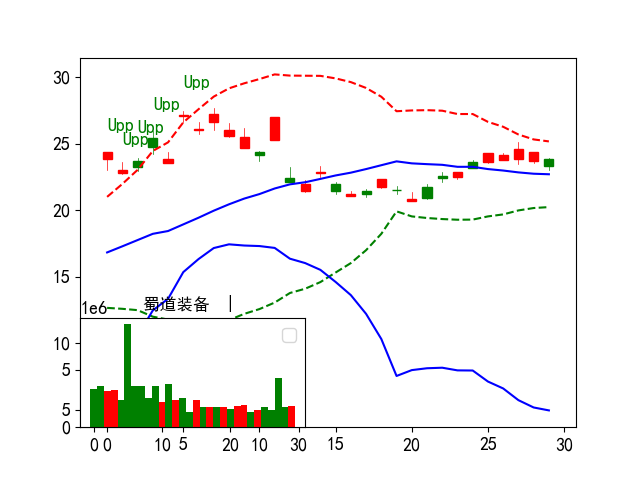

In [71]:
show_ohlc_upper(dfs.loc['300540'][-60:],code='300540')

### !!! df_mask250 upper xratio

In [72]:

if resample.upper() =='D':
    mask250 = ((dfs_tail9[('high')] > dfs_tail9.upper) &
               (dfs_tail9[('close')] > dfs_tail9[('ma5')])
               & (dfs_tail9[('ma5')] > dfs_tail9[('ma20')])
               & ((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift( 1)*0.99))
               & ((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))
               & (dfs_tail9['close'] > dfs_tail9[('hmax')]) &
                (dfs_tail9[('close')] > dfs_tail9[('ma250')]) | ((dfs_tail9[('high')] > dfs_tail9.upper) &
                                                                 (dfs_tail9[('close')] > dfs_tail9[('ma5')])) &
               (dfs_tail9[('ma5')] > dfs_tail9[('ma20')])
               & ((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift(1)*0.99))
               & ((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))
               & (dfs_tail9['low'] > dfs_tail9[('low')].shift(1))
               & (dfs_tail9[('close')] > dfs_tail9[('ma250')])
               & (dfs_tail9[('xratio')] > dfs_tail9[('xratio')].shift(1))
               & (dfs_tail9[('xratio')].shift(1) > dfs_tail9[('xratio')].shift(2))
              )
elif resample.upper() =='W' or resample == 'W-FRI':
    mask250 = (
               (dfs_tail9[('close')] > dfs_tail9[('ma5')])
               & (dfs_tail9[('ma5')] > dfs_tail9[('ma20')])
               & ((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift(1)*0.99))
               & ((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))
               & (dfs_tail9['low'] > dfs_tail9[('low')].shift(1))
               & (dfs_tail9[('xratio')] > dfs_tail9[('xratio')].shift(1))
               & (dfs_tail9[('xratio')].shift(1) > dfs_tail9[('xratio')].shift(2))
              )
else:
    mask250 = (
               (dfs_tail9[('close')] > dfs_tail9[('ma5')])
               & (dfs_tail9[('ma5')] > dfs_tail9[('ma20')])
               & ((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift(1)*0.99))
               & ((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))
               & (dfs_tail9['low'] > dfs_tail9[('low')].shift(1))
              )

# & (dfs_tail9[('close')] < dfs_tail9[('ma20'  )]*1.1))
idx = pd.IndexSlice
df_mask250 = dfs_tail9.loc[idx[mask250, :]]
df_mask250.shape
#站上Upper
df_mask250 = df_mask250[ (df_mask250[('close')] > df_mask250.upper)]

df_mask250 = get_multi_code_count(df_mask250)


code_t = '603131'
print((df_mask250.couts[:3], df_mask250.shape))
# df_mask250.loc[code_t]
groupd250 = df_mask250.groupby(level=[0])
df_mask250 = groupd250.tail(1).reset_index().set_index('code')
# df_mask250 = get_sina_data_cname(df_mask250, dm,realtime=True)



# df_mask250.loc[code_t].close
df_mask250 = get_sina_data_cname(df_mask250, realtime=True)
# df_mask250.loc[code_t].close

df_mask250 = clean_688(df_mask250)
# df_masklastd.loc['002722']

df_mask250 = df_mask250.sort_values(
    by=['idx','xratio',  'hat', 'perc1d'],
    ascending=[0, 0, 0, 0])
    # by=['xratio', 'idx', 'hat', 'perc1d'],

# by=['perc', 'perc5d', 'perc1d'],
# ascending=[0, 0, 0])
print("df_mask250:%s df_mask_hmax:%s"%(len(df_mask250),len(df_mask_hmax)))
cross_hmax_250 = [co for co in df_mask250.index.get_level_values(
    'code') if co in df_mask_hmax.index.get_level_values('code')]
# df_mask250.loc[code_t]
print("cross_hamx:%s" % (len(cross_hmax_250)))

show_tdx_data(df_mask250[df_mask250.couts > 1])
# show_tdx_data(df_mask250.loc[code_t])

(1781, 30)

count dd.couts
(code    date      
600766  2023-11-17    6
        2023-11-24    6
        2023-12-01    6
Name: couts, dtype: int64, (707, 31))
compute percent
df_mask250:461 df_mask_hmax:110
cross_hamx:57
Count:126 40


name  couts       date  perc  ra_diff  xratio    idx    hat   close  \
code                                                                          
000628  高新发展      3 2023-12-01  0.87     4.71    1.85  49.97  74.05   52.05   
301312   智立方      3 2023-12-22 -1.04     1.60    0.52  41.61  46.67  110.80   
300781  因赛集团      3 2023-12-22  7.49     3.06    0.87  39.27  42.89   59.01   
300949  奥雅股份      2 2023-12-22 -6.06     2.06    0.50  38.55  32.53   75.00   
603283  赛腾股份      2 2023-11-24  0.40     2.41    1.22  37.70  52.55   72.87   
...      ...    ...        ...   ...      ...     ...    ...    ...     ...   
300257  开山股份      2 2023-12-08  4.51     1.17    0.01   1.14   2.35   15.98   
600025  华能水电      2 2023-12-08  0.12     1.24    0.06   1.10   1.80    8.66   
603111  康尼机电      2 2023-12-01  1.28     1.27    0.02   1.01   1.52    5.55   
002042  华孚时尚      2 2023-11-24  1.99     1.35    0.03   0.95   1.38    4.10   
000908  景峰医药      2 2023-11-24 -0.30     1.50    0.04   0.57   1.19    3.28   

        volsum5d  ...   ma20  nclose    llow   vol1d   vol2d   vol3d   vol4d  \
code              ...                                                          
000628    6588.7  ...  26.91   51.72   58.50   45.58    5.89  -31.51  -20.26   
301312     152.2  ...  83.95  106.37  103.90   70.07  -62.53   28.95  134.30   
300781     130.0  ...  26.44   57.28   53.56  -24.13   21.80   98.41   98.78   
300949     523.2  ...  41.45   73.09   71.50  126.30  296.32    6.81    7.49   
603283     313.4  ...  47.63   71.51   79.29  -35.13   63.87  152.09   63.26   
...          ...  ...    ...     ...     ...     ...     ...     ...     ...   
300257     177.8  ...  14.23   15.57   15.52  -45.17  193.54   23.69   -4.73   
600025      53.4  ...   7.54    8.62    8.39  -21.37   58.88   14.25   10.17   
603111     808.9  ...   4.82    5.47    5.54   49.37  -60.37   72.56  -74.48   
002042     490.0  ...   3.31    3.99    4.07  -39.39  -59.18   13.11  -30.42   
000908     434.4  ...   3.03    3.26    3.57  -50.25  508.47  -42.81   52.73   

          vol5d  perc3d  perc5d  
code                             
000628  6589.00   14.47  104.65  
301312   -18.60   14.50   23.48  
300781   -64.83   95.14  116.23  
300949    86.28   79.08   86.29  
603283    69.33   50.37   81.59  
...         ...     ...     ...  
300257    10.44    9.78   11.59  
600025    -8.53    5.84    9.23  
603111   821.84    7.49   24.17  
002042   605.90    4.33   32.26  
000908   -33.75   13.04   27.72  

[126 rows x 23 columns]

df_mask250:126
000628 3.76
lastb:0.0 xratio:1.67 ra_diff:3.76


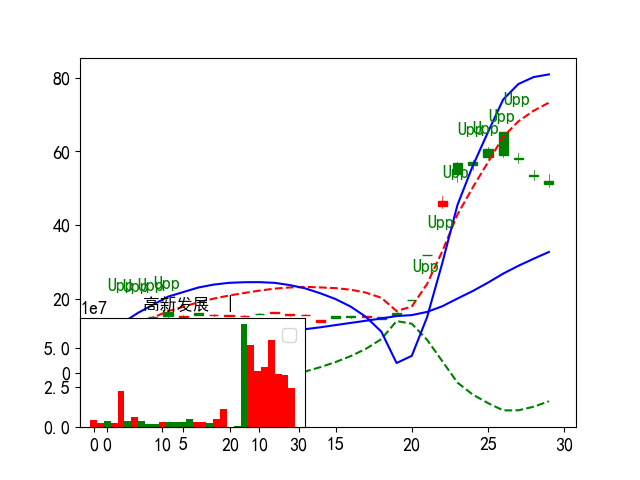

301312 1.6
lastb:0.0 xratio:-0.04 ra_diff:1.6


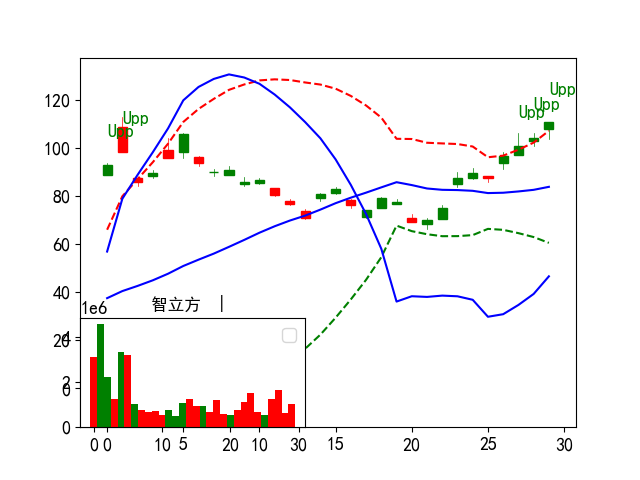

300781 3.06
lastb:0.0 xratio:0.45 ra_diff:3.06


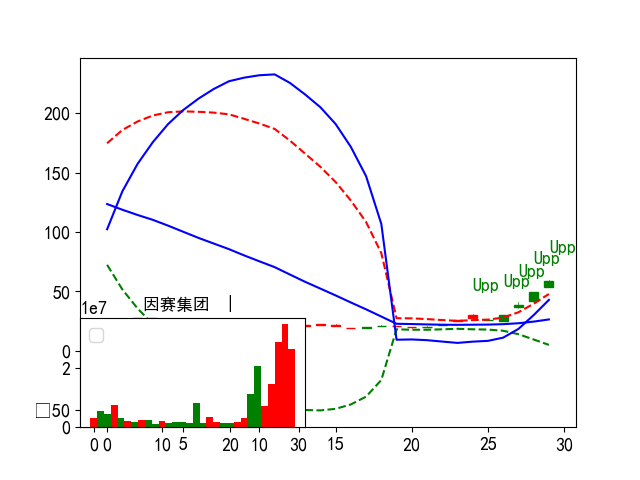

300949 2.06
lastb:0.0 xratio:0.33 ra_diff:2.06


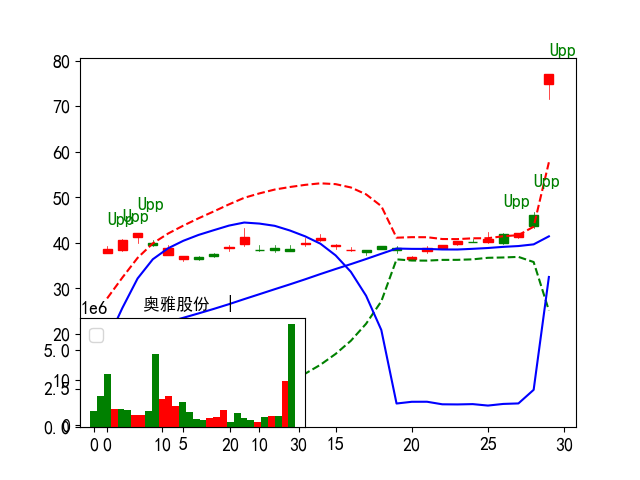

603283 2.14
lastb:0.0 xratio:1.26 ra_diff:2.14


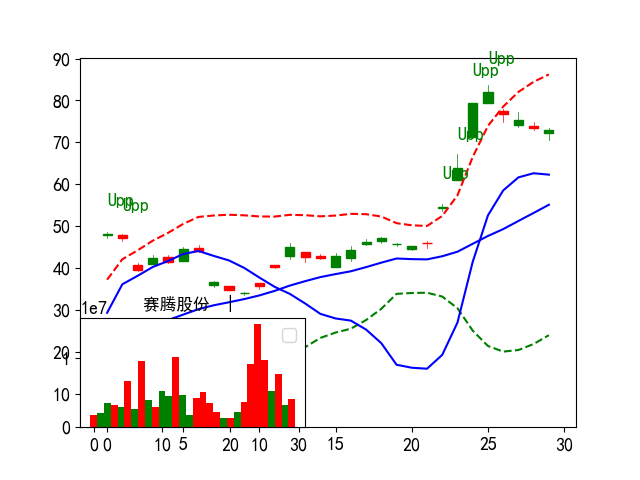

001314 1.81
lastb:0.0 xratio:0.15 ra_diff:1.81


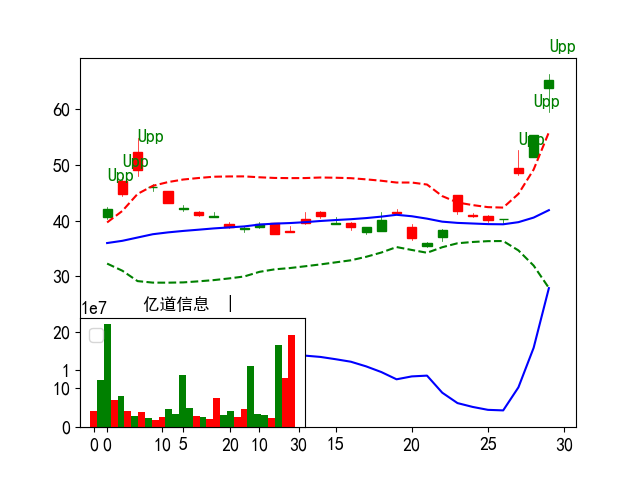

300857 2.16
lastb:0.0 xratio:0.75 ra_diff:2.16


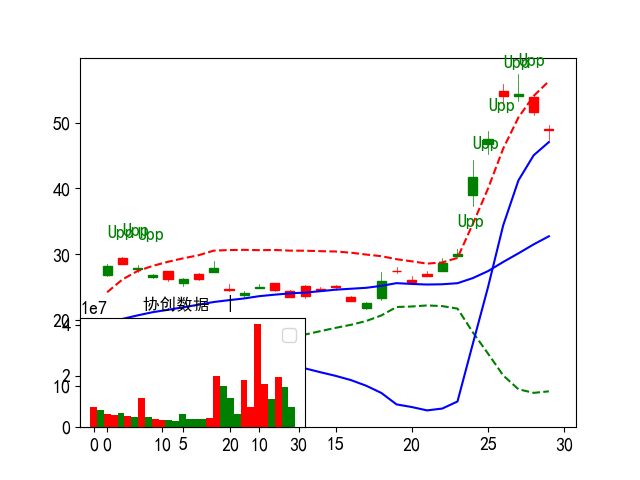

603266 2.27
lastb:0.0 xratio:0.74 ra_diff:2.27


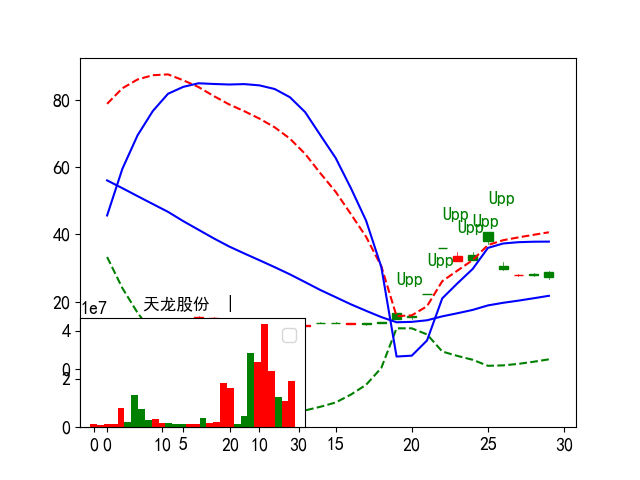

603729 2.89
lastb:0.0 xratio:0.45 ra_diff:2.89


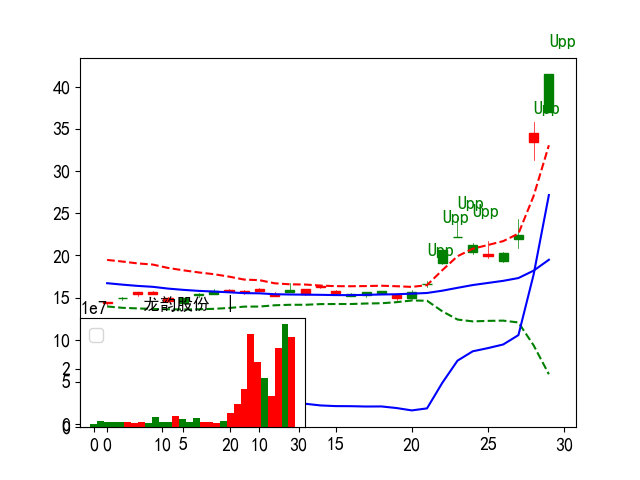

600520 2.1
lastb:0.0 xratio:0.69 ra_diff:2.1


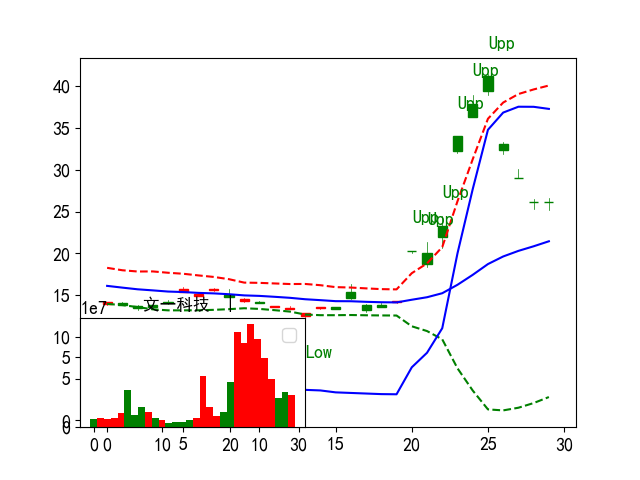

In [73]:
print("df_mask250:%s"%(len(df_mask250[df_mask250.couts > 1])))
for co in df_mask250[df_mask250.couts > 1].index[:10]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfs.loc[co][-60:],code=co)

### Tail1 Show Top 主升浪df_masklastd

In [74]:
df_mask250[(df_mask250.date >= lastday_week)][:2]
df_mask250[df_mask250.ra_diff > 1.3].shape

date   lopen   lhigh    llow   close         vol        amount  \
code                                                                          
301312 2023-12-22  107.99  110.93  103.90  110.80   1049901.0  1.125352e+08   
300781 2023-12-22   53.60   59.80   53.56   59.01  26756857.0  1.532787e+09   

        ra_diff     ma5   ma10  ...    idx  couts  nclose  name    open  \
code                            ...                                       
301312     1.60  100.05  89.21  ...  41.61      3  106.37   智立方  107.99   
300781     3.06   40.83  31.88  ...  39.27      3   57.28  因赛集团   53.60   

          high     low  llastp            ticktime  perc  
code                                                      
301312  110.93  103.90  111.96 2023-12-21 15:35:15 -1.04  
300781   59.80   53.56   54.90 2023-12-21 15:35:15  7.49  

[2 rows x 40 columns]

(317, 40)

In [75]:
# df_masklastd = df_mask250[(df_mask250.date >= '2023-02-06') & (df_mask250.perc1d < 21) & (df_mask250.perc2d > 0) &
if resample.upper() =='D':
    df_masklastd = df_mask250[(df_mask250.date >= lastday) & (df_mask250.perc1d < 21) & (df_mask250.perc2d > 0)
                          & ((df_mask250.volsum5d > 10) & (df_mask250.close > df_mask250.ma5) )
                          ]
                          # & ((df_mask250.perc3d > 0) | ((df_mask250.close.shift(2) > df_mask250.ma5.shift(2))) )
else:
    df_masklastd = df_mask250[(df_mask250.date >= lastday_week) & (df_mask250.perc1d < 21) & (df_mask250.perc2d > 0)
                          & ((df_mask250.volsum5d > 20) & (df_mask250.close > df_mask250.ma5) )
                          ]
# (df_mask250.couts == 1) & (df_mask250.perc1d < 21)]

#当下大于上轨
df_masklastd = df_masklastd[df_masklastd.close > df_masklastd.ma5]

print("src:%s  lastd:%s " % (df_mask250.shape, df_masklastd.shape))


if resample.upper() =='M':
    df_masklastd = df_masklastd.sort_values(
        by=['perc1d', 'perc3d'],
        ascending=[0, 0])
else:
    df_masklastd = df_masklastd.sort_values(
        by=['perc3d', 'perc1d'],
        ascending=[0, 0])

# print(
#     (df_masklastd.loc
#      [:, ['name', 'couts', 'date', 'perc1d', 'perc3d', 'perc5d']][:10],
#      df_masklastd.shape,))

show_tdx_data(df_masklastd)
show_tdx_data(df_masklastd[-10:])


code_t = '300675'
code_t = '605268'
code_t = '002828'
code_t = '300418'
code_t = df_masklastd.index[0]


# df_masklastd.loc[code_t, ['name', 'couts',
#                           'date', 'perc1d', 'perc3d', 'perc5d']]

# df_masklastd.loc[code_t].date


# df_mask250 = groupd250.head(1)

# df_masklastd.loc[code_t].date
# show_tdx_data(df_masklastd.loc[code_t])


# show_tdx_data(df_masklastd.loc[code_t])

src:(461, 40)  lastd:(46, 40) 
Count:46 40


name  couts       date   perc  ra_diff  xratio    idx    hat   close  \
code                                                                           
300781  因赛集团      3 2023-12-22   7.49     3.06    0.87  39.27  42.89   59.01   
001314  亿道信息      3 2023-12-22   1.54     1.81    0.49  28.35  27.89   65.25   
605289  罗曼股份      2 2023-12-22  -1.92     1.87    0.38  19.31  25.60   52.60   
300556  丝路视觉      2 2023-12-22   5.16     1.53    0.21  10.52  10.17   33.00   
002862  实丰文化      1 2023-12-22 -10.00     1.43   -0.00   6.48   6.50   21.68   
605086  龙高股份      2 2023-12-22   2.83     1.76    0.50  15.01  19.80   34.90   
603825  华扬联众      2 2023-12-22  -3.80     1.44    0.01   4.69   4.39   15.45   
300805  电声股份      1 2023-12-22 -10.47     1.49    0.09   3.78   3.68   11.63   
002878  元隆雅图      2 2023-12-22  10.02     1.53    0.11   7.70   7.79   22.17   
300421  力星股份      1 2023-12-22   2.83     1.39   -0.01   3.37   2.89   12.00   
603721  中广天择      3 2023-12-22  -7.72     2.40    0.59  20.85  27.61   36.36   
300031  宝通科技      1 2023-12-22   1.56     1.44   -0.10   6.14   6.77   22.75   
301153  中科江南      3 2023-12-22   3.94     1.46    0.06  21.80  26.39   81.21   
002933  新兴装备      3 2023-12-22   2.22     1.33    0.19   8.32   8.55   35.38   
600421  华嵘控股      1 2023-12-22  10.03     1.37    0.02   3.40   2.83   12.62   
002861  瀛通通讯      3 2023-12-22   2.50     1.53    0.16   4.68   5.65   16.37   
002022  科华生物      1 2023-12-22  -2.36     1.28   -0.01   2.37   2.10   10.74   
002395  双象股份      4 2023-12-22  -1.06     1.37    0.08   3.48   3.80   14.02   
002354  天娱数科      1 2023-12-22   5.48     1.35   -0.03   1.71   1.70    6.54   
301312   智立方      3 2023-12-22  -1.04     1.60    0.52  41.61  46.67  110.80   
600679  上海凤凰      2 2023-12-22   1.83     1.32    0.04   2.53   2.74   10.59   
300862  蓝盾光电      4 2023-12-22   2.26     1.55    0.22  11.74  15.52   36.66   
603977  国泰集团      1 2023-12-22   0.41     1.24    0.00   1.89   1.75    9.87   
603656  泰禾智能      1 2023-12-22  -6.30     1.34    0.06   3.12   3.61   15.77   
603007  ST花王      1 2023-12-22   0.57     1.31   -0.01   1.24   1.44    5.27   
300007  汉威科技      2 2023-12-22   1.42     1.35    0.09   4.85   5.91   20.74   
603090  宏盛股份      2 2023-12-22   4.65     1.28    0.05   5.39   4.85   24.77   
002587  奥拓电子      1 2023-12-22   3.42     1.29    0.02   1.32   1.67    7.86   
603121  华培动力      1 2023-12-22   0.10     1.38    0.05   2.54   2.93   10.45   
002009  天奇股份      1 2023-12-22   3.11     1.35    0.09   3.87   5.15   15.89   
600535   天士力      4 2023-12-22   0.53     1.30    0.11   3.70   4.45   17.11   
603329  上海雅仕      1 2023-12-22   0.06     1.30    0.10   3.15   3.85   16.05   
600592  龙溪股份      1 2023-12-22   5.69     1.55    0.09   3.93   4.74   12.64   
601177  杭齿前进      1 2023-12-22   3.12     1.19   -0.07   1.62   1.69   10.26   
002660  茂硕电源      1 2023-12-22   3.09     1.29    0.04   1.72   2.44   10.67   
002150  通润装备      1 2023-12-22   5.59     1.33   -0.07   4.20   4.57   16.80   
300984  金沃股份      1 2023-12-22   0.32     1.25    0.04   5.60   5.04   28.45   
301280  珠城科技      1 2023-12-22  -0.79     1.22    0.05   6.59   7.20   40.05   
603201  常润股份      1 2023-12-22   5.91     1.38    0.23   4.48   7.70   28.15   
300793  佳禾智能      1 2023-12-22   1.87     1.20    0.04   2.59   3.37   20.14   
301345  涛涛车业      1 2023-12-22   1.21     1.32    0.18  14.78  13.51   60.29   
002972   科安达      1 2023-12-22  -1.10     1.16   -0.02   1.76   1.57   12.60   
605056  咸亨国际      1 2023-12-22   1.67     1.20    0.01   2.29   2.11   13.97   
002856  美芝股份      4 2023-12-22   1.24     1.68    0.17   5.45   7.07   15.53   
301001  凯淳股份      1 2023-12-22   4.71     1.18    0.03   4.44   4.32   28.91   
300056  中创环保      3 2023-12-22  -0.67     1.47    0.07   1.98   3.41    8.85   

        volsum5d  ...   ma20  nclose    llow   vol1d    vol2d   vol3d   vol4d  \
code              ...                                                           
30078

Count:10 40


name  couts       date  perc  ra_diff  xratio    idx    hat  close  \
code                                                                         
300984  金沃股份      1 2023-12-22  0.32     1.25    0.04   5.60   5.04  28.45   
301280  珠城科技      1 2023-12-22 -0.79     1.22    0.05   6.59   7.20  40.05   
603201  常润股份      1 2023-12-22  5.91     1.38    0.23   4.48   7.70  28.15   
300793  佳禾智能      1 2023-12-22  1.87     1.20    0.04   2.59   3.37  20.14   
301345  涛涛车业      1 2023-12-22  1.21     1.32    0.18  14.78  13.51  60.29   
002972   科安达      1 2023-12-22 -1.10     1.16   -0.02   1.76   1.57  12.60   
605056  咸亨国际      1 2023-12-22  1.67     1.20    0.01   2.29   2.11  13.97   
002856  美芝股份      4 2023-12-22  1.24     1.68    0.17   5.45   7.07  15.53   
301001  凯淳股份      1 2023-12-22  4.71     1.18    0.03   4.44   4.32  28.91   
300056  中创环保      3 2023-12-22 -0.67     1.47    0.07   1.98   3.41   8.85   

        volsum5d  ...   ma20  nclose   llow   vol1d   vol2d   vol3d   vol4d  \
code              ...                                                         
300984     294.8  ...  24.98   27.72  27.16   -4.67  -28.34   73.52  188.95   
301280     711.6  ...  36.08   39.66  38.51    1.79   39.61  700.47  -37.47   
603201     904.4  ...  23.94   26.90  26.35  942.58  -59.18   54.30    8.96   
300793     183.5  ...  18.44   19.97  19.55   57.55   51.96   22.71  -54.67   
301345     267.1  ...  50.69   59.49  58.20   54.60   38.36  -71.72  273.03   
002972     734.1  ...  11.74   12.49  12.25  102.70  597.23   17.22  -22.96   
605056     423.8  ...  12.57   13.80  13.65   40.95   35.46  -59.64  418.74   
002856     491.4  ...  11.48   15.20  14.91  -14.89  -70.98   -1.17  594.46   
301001     142.4  ...  26.51   27.92  27.25  125.56  -10.06  -43.71  109.60   
300056     340.6  ...   7.13    8.69   8.51  395.21  -56.84  -60.40   -3.05   

         vol5d  perc3d  perc5d  
code                            
300984   65.39   10.14   11.39  
301280    7.18    8.71    5.95  
603201  -42.31    8.06    8.81  
300793  105.91    7.70    2.81  
301345  -27.21    7.30   17.34  
002972   39.88    5.44    5.62  
605056  -11.72    5.43   10.70  
002856  -16.04    5.29   38.17  
301001  -39.00    2.23    4.07  
300056   65.71   -0.67   18.32  

[10 rows x 23 columns]

### !!! df_mask_hmax 061

df_mask_hmax:110
002021 2.12
lastb:0.0 xratio:0.03 ra_diff:2.12


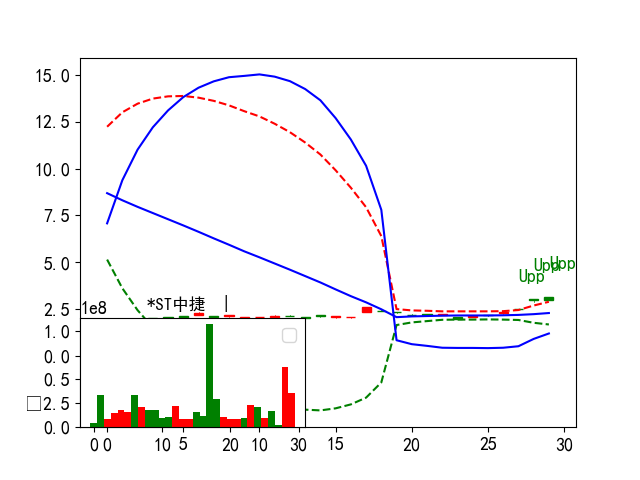

603967 1.26
lastb:0.0 xratio:0.03 ra_diff:1.26


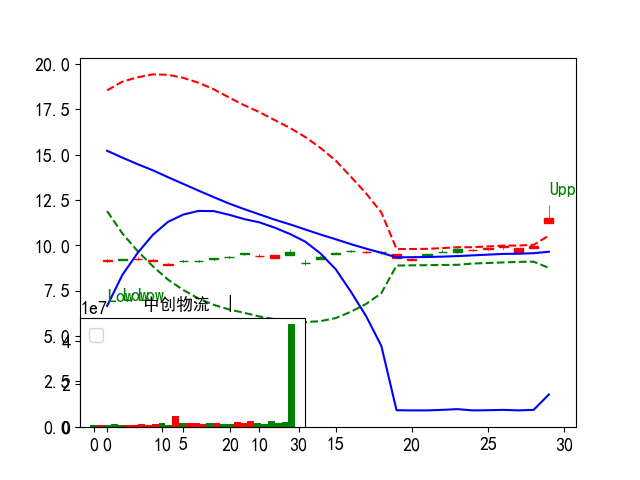

301032 1.36
lastb:0.0 xratio:0.06 ra_diff:1.36


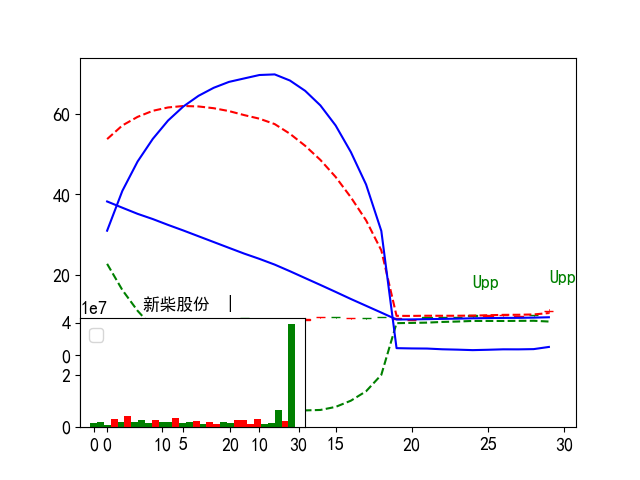

603789 1.77
lastb:0.0 xratio:0.03 ra_diff:1.77


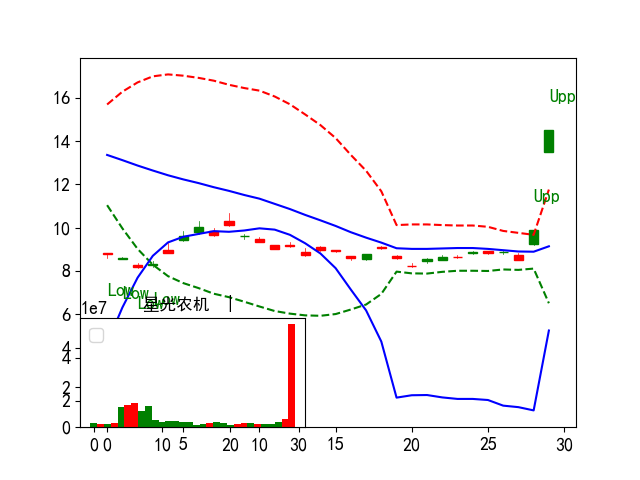

002862 1.43
lastb:0.0 xratio:-0.03 ra_diff:1.43


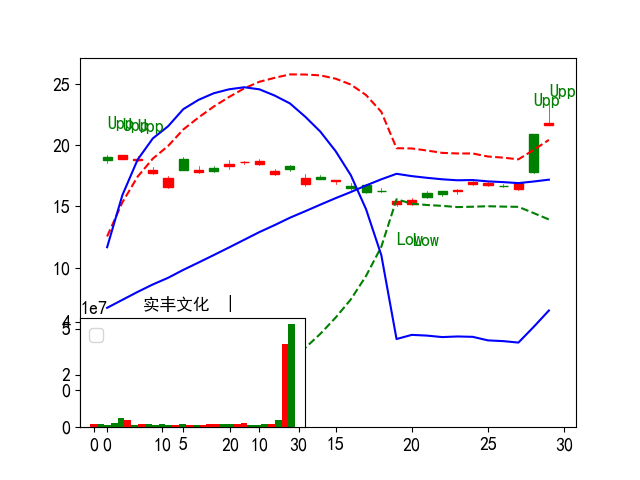

002306 1.27
lastb:0.0 xratio:-0.01 ra_diff:1.27


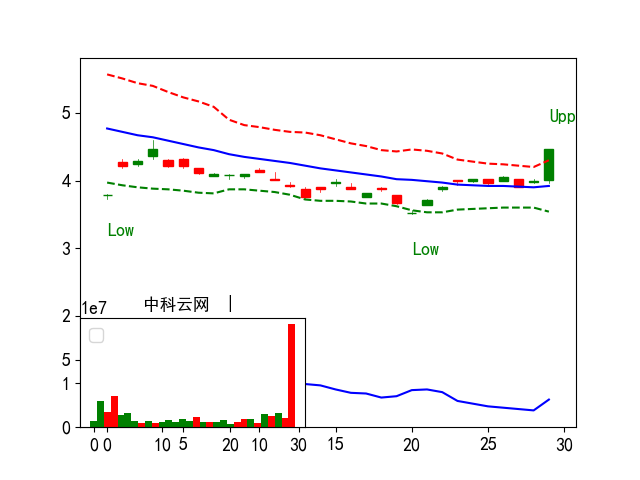

002861 1.53
lastb:0.0 xratio:0.12 ra_diff:1.53


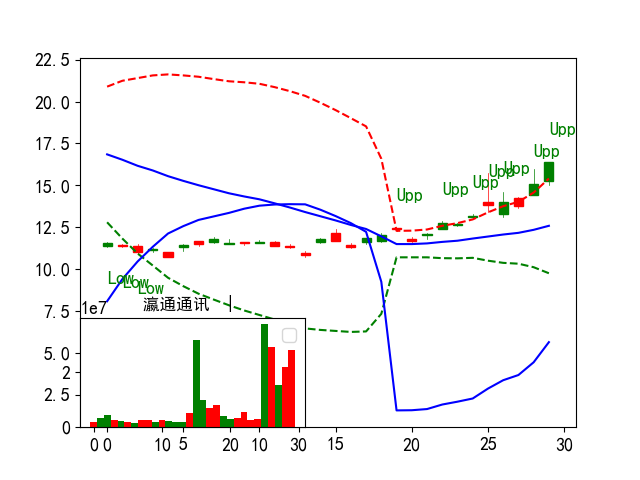

300492 1.38
lastb:0.0 xratio:0.21 ra_diff:1.38


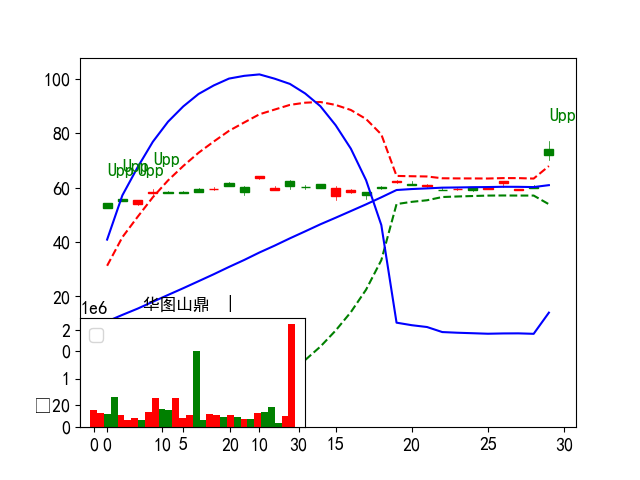

603201 1.38
lastb:0.0 xratio:0.16 ra_diff:1.38


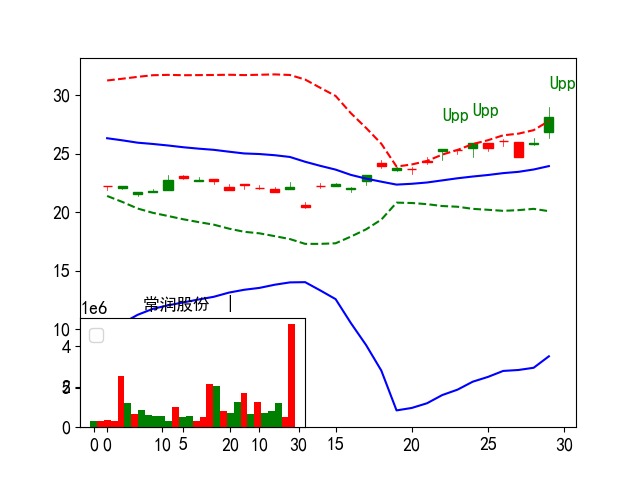

001314 1.81
lastb:0.0 xratio:0.15 ra_diff:1.81


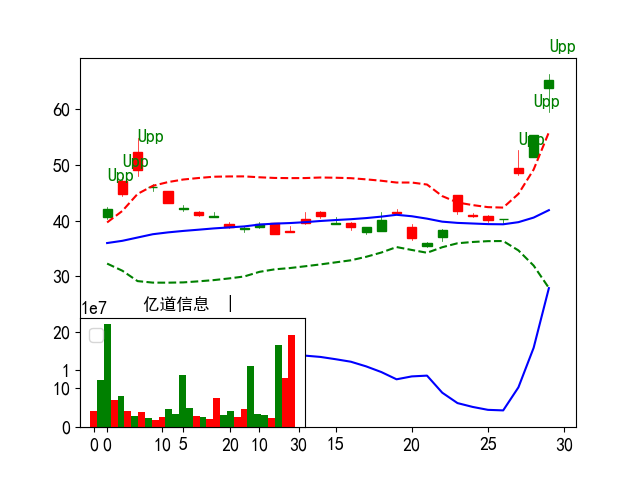

In [76]:
print("df_mask_hmax:%s"%(len(df_mask_hmax)))
for co in df_mask_hmax.index[:10]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfs.loc[co][-60:],code=co)

###  df_masklastd 068
    show_ohlc_upper(dfs.loc[co][-60:])

df_masklastd:46
300781 3.06
lastb:0.0 xratio:0.45 ra_diff:3.06


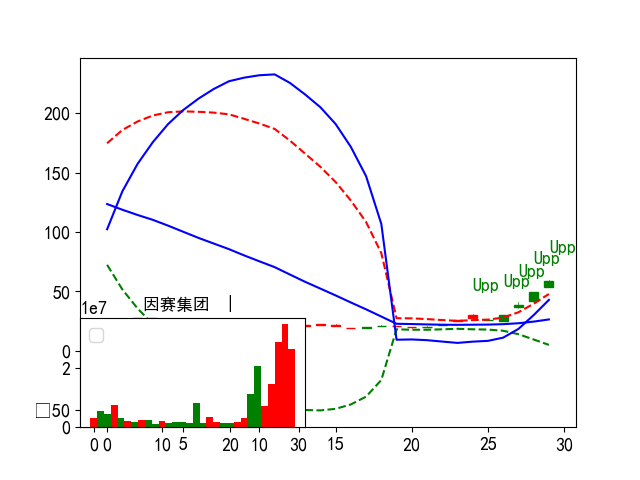

001314 1.81
lastb:0.0 xratio:0.15 ra_diff:1.81


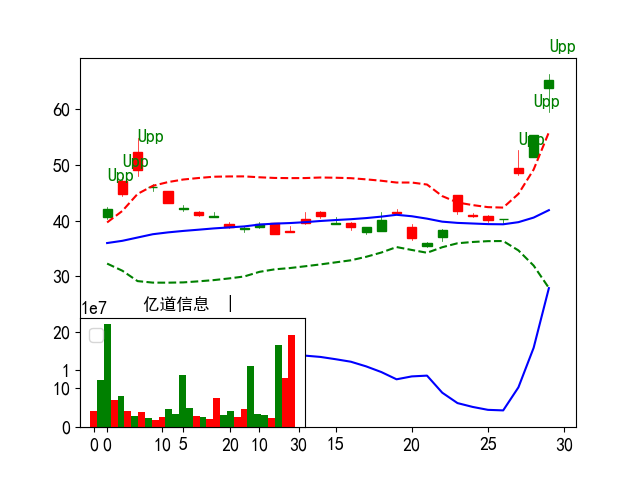

605289 1.87
lastb:0.0 xratio:0.31 ra_diff:1.87


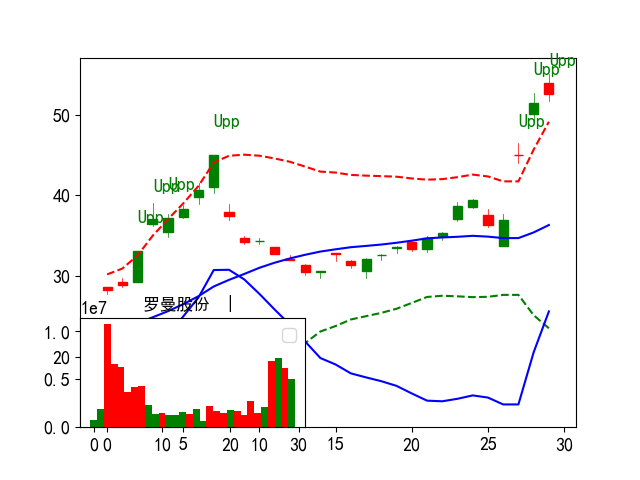

300556 1.53
lastb:0.0 xratio:0.03 ra_diff:1.53


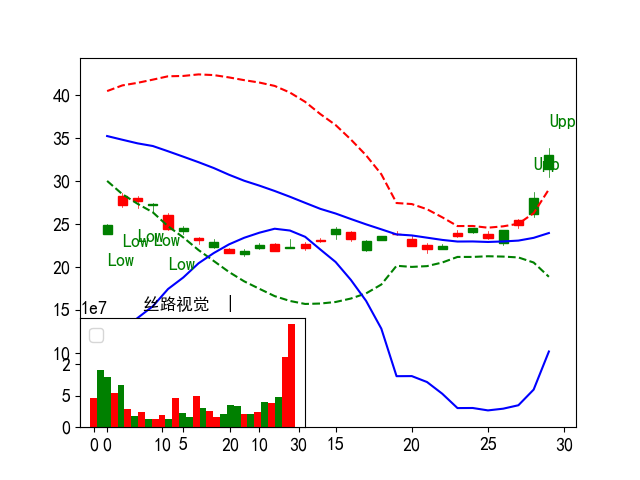

002862 1.43
lastb:0.0 xratio:-0.03 ra_diff:1.43


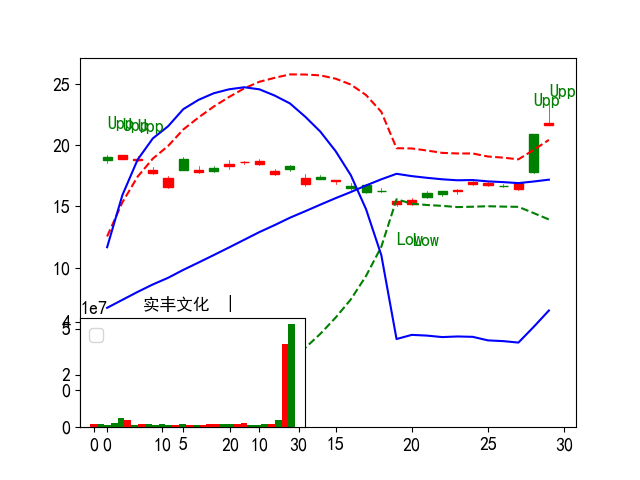

605086 1.76
lastb:0.0 xratio:0.37 ra_diff:1.76


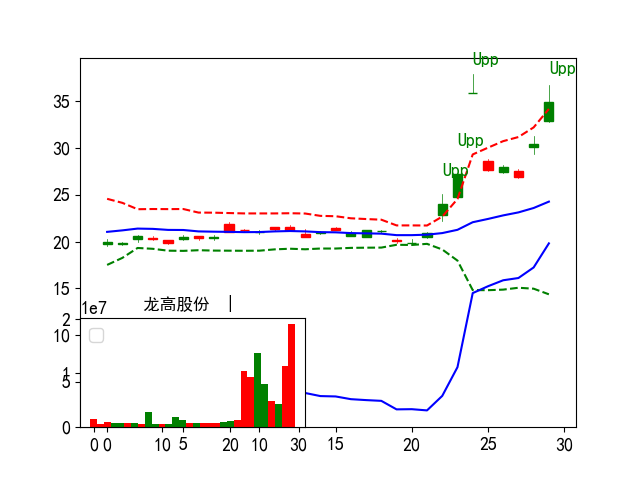

603825 1.44
lastb:0.0 xratio:-0.04 ra_diff:1.44


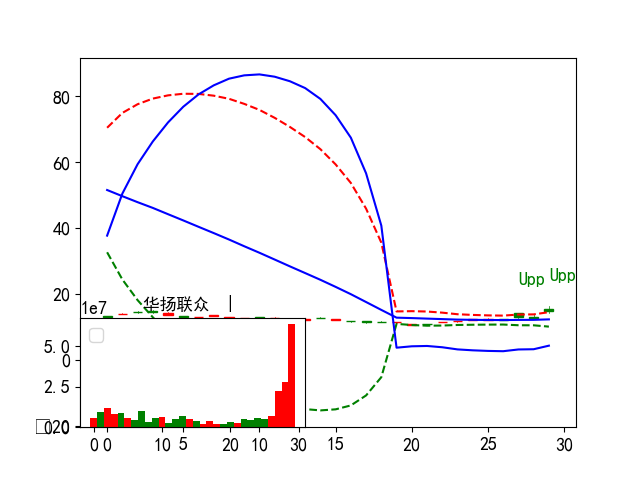

300805 1.49
lastb:0.0 xratio:0.04 ra_diff:1.49


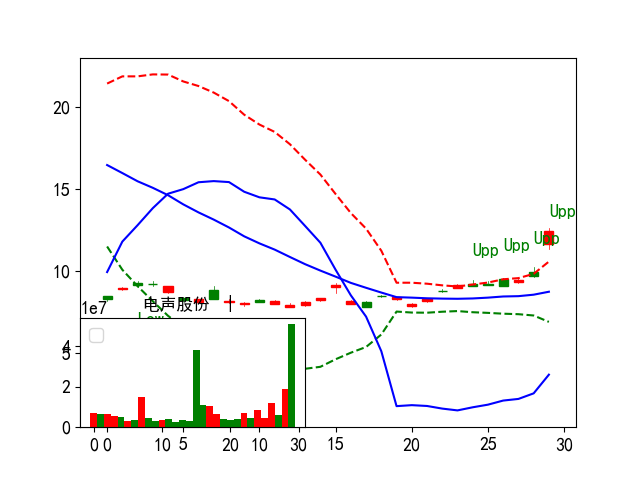

002878 1.53
lastb:0.0 xratio:0.02 ra_diff:1.53


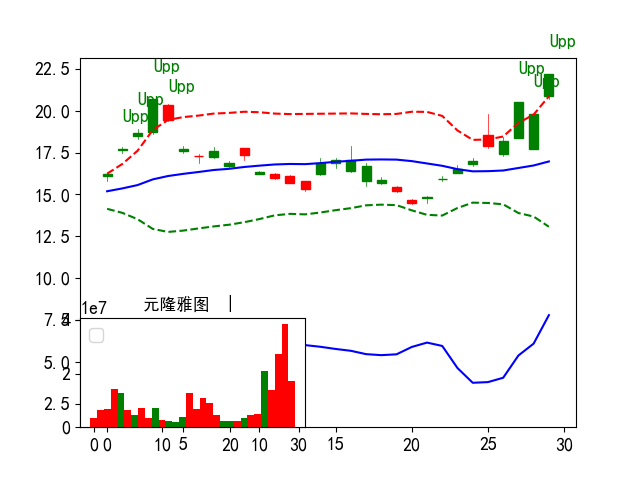

300421 1.39
lastb:0.0 xratio:-0.01 ra_diff:1.39


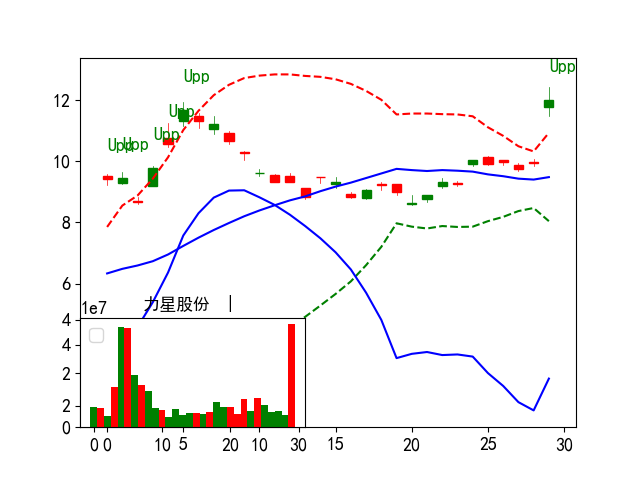

In [77]:
print("df_masklastd:%s"%(len(df_masklastd)))
for co in df_masklastd.index[:10]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfs.loc[co][-60:],code=co)

### Cross_hmax_250 068

In [84]:
# dfs.loc[code_t].ma5
cross_hmax_250 = [co for co in df_masklastd.index.get_level_values(
    'code') if co in df_mask_hmax.index.get_level_values('code')]
# df_mask250.loc[code_t]
print("cross_hamx:%s" % (len(cross_hmax_250)))
show_tdx_data(df_masklastd.loc[cross_hmax_250][:5])

cross_hamx:40
Count:5 40


name  couts       date   perc  ra_diff  xratio    idx    hat  close  \
code                                                                          
300781  因赛集团      3 2023-12-22   7.49     3.06    0.87  39.27  42.89  59.01   
001314  亿道信息      3 2023-12-22   1.54     1.81    0.49  28.35  27.89  65.25   
605289  罗曼股份      2 2023-12-22  -1.92     1.87    0.38  19.31  25.60  52.60   
300556  丝路视觉      2 2023-12-22   5.16     1.53    0.21  10.52  10.17  33.00   
002862  实丰文化      1 2023-12-22 -10.00     1.43   -0.00   6.48   6.50  21.68   

        volsum5d  ...   ma20  nclose   llow  vol1d    vol2d   vol3d   vol4d  \
code              ...                                                         
300781     130.0  ...  26.44   57.28  53.56 -24.13    21.80   98.41   98.78   
001314     833.2  ...  41.86   62.11  59.45  89.50   -40.61  821.22  -25.24   
605289     239.4  ...  36.31   52.46  51.69 -19.28   -14.63    4.58  228.69   
300556     271.4  ...  23.95   32.13  30.51  46.96   135.36   23.16   -4.69   
002862    1265.6  ...  17.19   22.33  21.68  24.51  1107.48  109.03    1.52   

        vol5d  perc3d  perc5d  
code                           
300781 -64.83   95.14  116.23  
001314 -11.67   61.91   59.54  
605289  40.08   42.24   33.54  
300556  70.60   36.03   34.69  
002862  23.03   29.82   28.82  

[5 rows x 23 columns]

df_mask250:40
300984 1.25
lastb:0.0 xratio:0.05 ra_diff:1.25


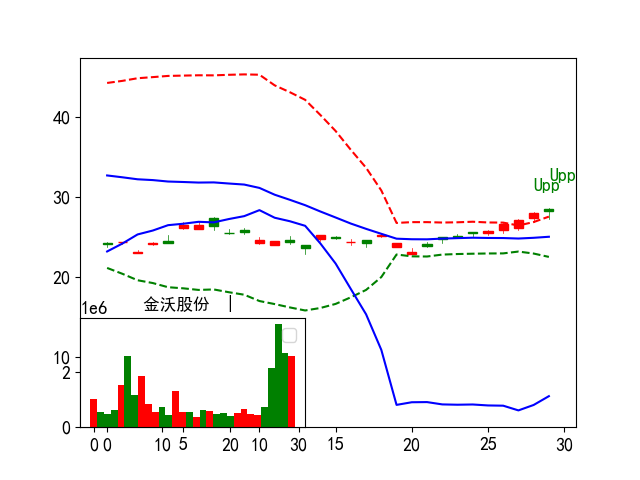

301280 1.22
lastb:0.0 xratio:0.07 ra_diff:1.22


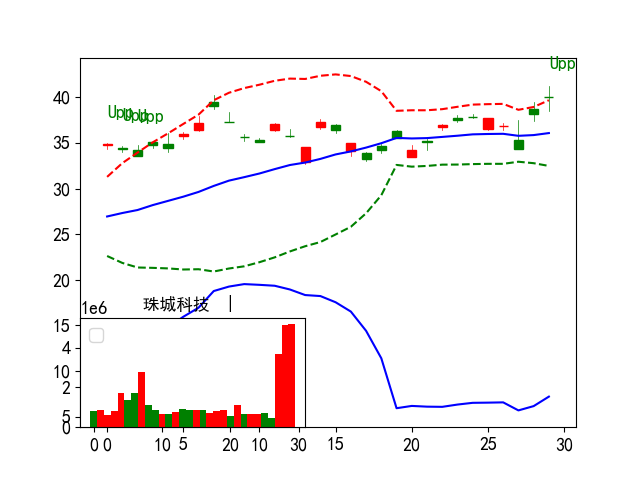

603201 1.38
lastb:0.0 xratio:0.16 ra_diff:1.38


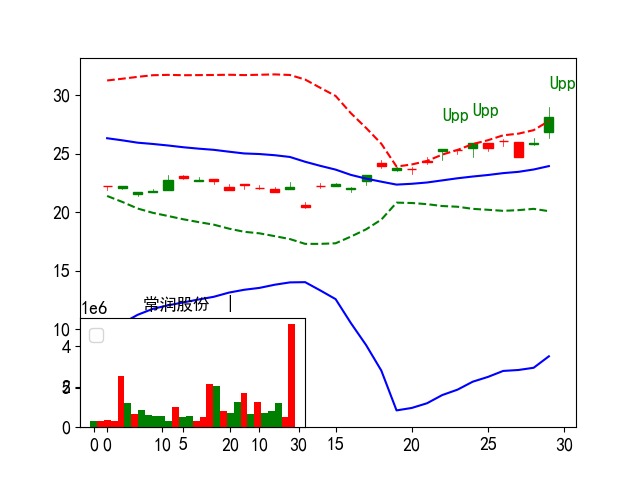

300793 1.2
lastb:0.0 xratio:-0.06 ra_diff:1.2


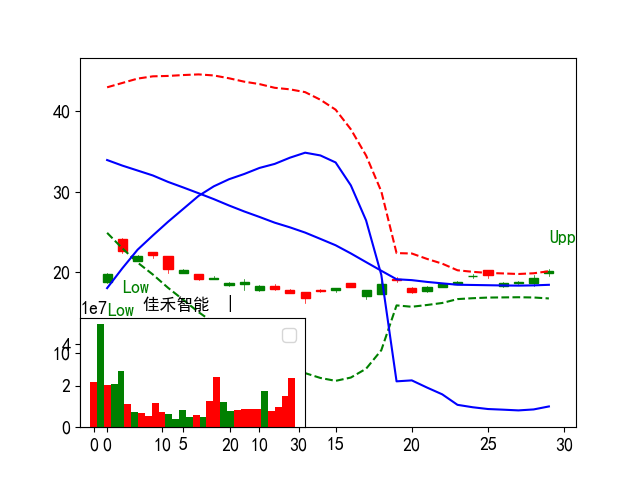

301345 1.32
lastb:0.0 xratio:0.19 ra_diff:1.32


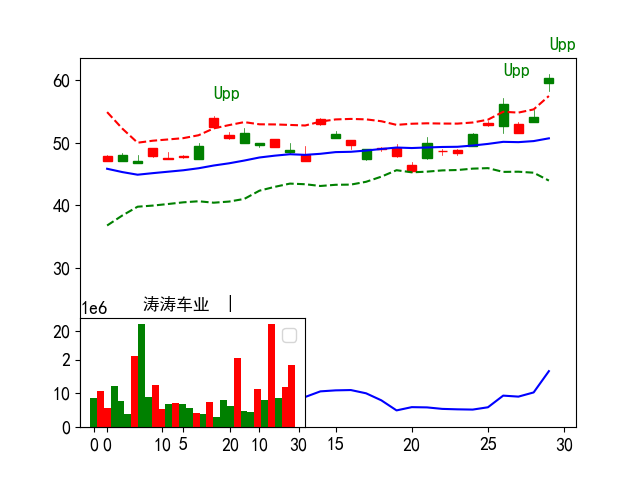

002972 1.16
lastb:0.0 xratio:-0.03 ra_diff:1.16


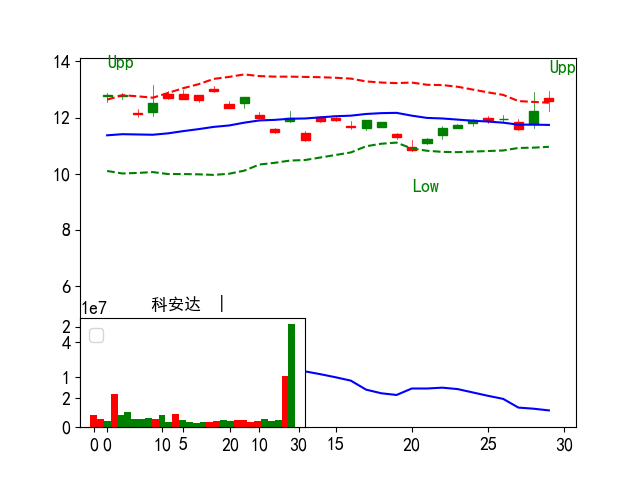

605056 1.2
lastb:0.0 xratio:0.0 ra_diff:1.2


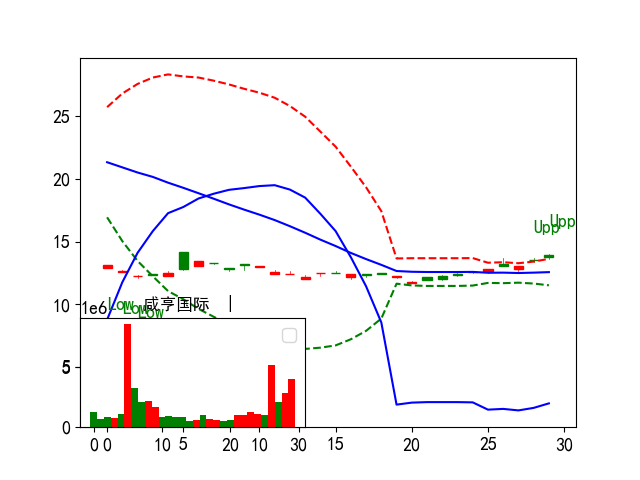

002856 1.68
lastb:0.0 xratio:0.14 ra_diff:1.68


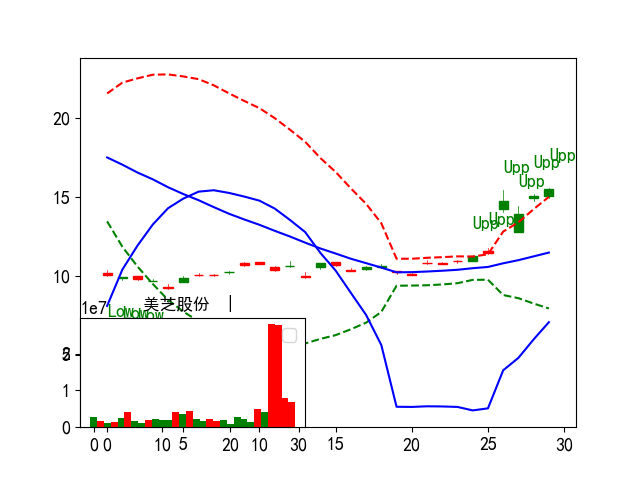

301001 1.18
lastb:0.0 xratio:-0.06 ra_diff:1.18


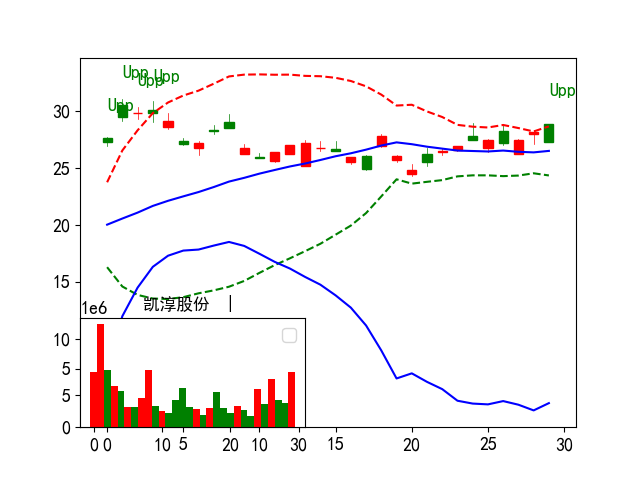

300056 1.47
lastb:0.0 xratio:0.04 ra_diff:1.47


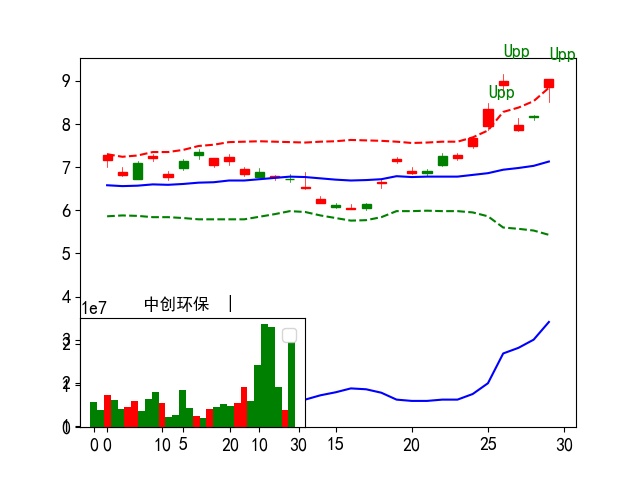

In [79]:
print("df_mask250:%s"%(len(cross_hmax_250)))
for co in cross_hmax_250[-10:]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfs.loc[co][-60:],code=co)

## 写入061

In [80]:
# write_code_to_blk(df_masklastd.index.tolist(),'061')
# hmax_code = df_mask_hmax[(df_mask_hmax.couts > 1) & (df_mask_hmax.volsum5d > 10) & (df_mask_hmax.volsum5d < 150)].index.tolist()
hmax_code = df_mask_hmax[(df_mask_hmax.couts > 1) ].index.tolist()

# write_code_to_blk(cross_hmax_250,'068')
# write_code_to_blk(hmax_code,'061')

In [81]:
# print(df_masklastd.loc['301255'].date)

# 默认年线筛选

In [82]:
top_temp.shape
top_temp.index

(60, 33)

Index(['600159', '301312', '600250', '600571', '605577', '605289', '605286',
       '605086', '603825', '603789', '603779', '603729', '603721', '603661',
       '603660', '600630', '600678', '600692', '600715', '601022', '600421',
       '601595', '603230', '603389', '603392', '603536', '603598', '603615',
       '603106', '000526', '002313', '002888', '300063', '301153', '301076',
       '300949', '300862', '300805', '300781', '300556', '300494', '300492',
       '300421', '300354', '300093', '300031', '002878', '002952', '000609',
       '000656', '000766', '001300', '001314', '600178', '002238', '002786',
       '002856', '002861', '002862', '000421'],
      dtype='object', name='code')

## plt.close('all')

In [83]:
# plt.close('all')

# 写入060